In [9]:
# compare the data/mc for cluster shape/position, variables used for BDT training

import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import awkward
import numpy as np
import time
from matplotlib import pyplot as plt
sys.path.append('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, make_ratio_plot
import os
import CMS_lumi, tdrstyle
a = tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0

wH = 1
Z_MASS = 91.2

# donotdelete = []
print(sys.version)

3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


In [10]:
fpath_bkg =OrderedDict()
tree_bkg = OrderedDict()
tree_sig = OrderedDict()
fpath_sig =OrderedDict()
year = '2017'
# year = 'all'
category = 0
ver = 'V1p17'
sig_ver = 'v24'

singleMuon = True
if singleMuon:
    if sig_ver == 'v14':data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ver+'/Data'+year+'/v5/v12/normalized/'
    else: data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ver+'/Data'+year+'/v5/'+sig_ver+'/normalized/'
    if year == 'full': data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/Data2018/v5/v9/normalized/'
else:
    data_path = '/mnt/hadoop//store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/Data2018/v1/v29/normalized/'
bkg_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall17/v1/'+sig_ver+'/normalized/'
sig_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v1/v4/normalized/'



lumi = (5.632467289 +2.572903489 +1.685313225 +3.988453305 +3.068943620 +3.527270568 +8.609721915) * 1000
lumi = 41.53*1000
print("lumi is "+str(round(lumi/1000,2))+" fb-1")
# fpath_bkg['mc_signal'] = sig_path+"ZH_HToSSTobbbb_ms55_1pb_weighted.root"
# fpath_bkg['dy_50_120'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_50_120_1pb_weighted.root'
# fpath_bkg['dy_120_200'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_120_200_1pb_weighted.root'
# fpath_bkg['dy_200_400'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_200_400_1pb_weighted.root'
# fpath_bkg['dy_400_800'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_400_800_1pb_weighted.root'
# fpath_bkg['dy_50_800'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_50_800_1pb_weighted.root'
# fpath_bkg['dy_50_Inf'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_50_Inf_1pb_weighted.root'
# fpath_bkg['dy_50_800'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_50_800_1pb_weighted.root'
fpath_bkg['dy_120_800'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_120_800_137000pb_weighted.root'

fpath_bkg['dy_120_800'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_120_800_1pb_weighted.root'


# fpath_bkg['dy_1400_2300'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_1400_2300_1pb_weighted.root'
# fpath_bkg['dy_2300_3500'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_2300_3500_1pb_weighted.root'
# fpath_bkg['dy_3500_4500'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_3500_4500_1pb_weighted.root'
# fpath_bkg['dy_4500_6000'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_4500_6000_1pb_weighted.root'
# fpath_bkg['dy_6000_Inf'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_6000_Inf_1pb_weighted.root'



        


if year=='2018':fpath_bkg['data'] = data_path+"Run2_displacedJetMuonNtupler_V1p17_Data2018_17Sept2018_Run2018-ZMu-17Sep2018_goodLumi.root"
elif year=='2017': fpath_bkg['data'] = data_path+"Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-ZMu-17Nov2017_goodLumi.root"
elif year=='2016': fpath_bkg['data'] = data_path+"Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016-ZMu-07Aug17_goodLumi.root"
elif year == 'all':
    fpath_bkg['data16'] = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ver+'/Data2016/v5/'+sig_ver+'/normalized/'\
        +"Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016-ZMu-07Aug17_goodLumi.root"
    fpath_bkg['data17'] = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ver+'/Data2017/v5/'+sig_ver+'/normalized/'\
    +"Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-ZMu-17Nov2017_goodLumi.root"
    fpath_bkg['data18'] = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ver+'/Data2018/v5/'+sig_ver+'/normalized/'\
    +"Run2_displacedJetMuonNtupler_V1p17_Data2018_17Sept2018_Run2018-ZMu-17Sep2018_goodLumi.root"


else: fpath_bkg['data'] = data_path+"Run2_displacedJetMuonNtupler_V1p17_Data2016_Data2017_Data2018-ZMu_goodLumi.root"


# fpath_bkg['data'] = data_path+"Run2_displacedJetMuonNtupler_V1p17_Data2016_Data2017_Data2018-ZMu_goodLumi.root"



# fpath_bkg['data'] = data_path+"Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016-ZMu-07Aug17_goodLumi.root"


    

lumi is 41.53 fb-1


In [11]:
for k,v in fpath_bkg.items():
    print (k, v)
    root_dir = uproot.open(v) 
    tree_bkg[k] = root_dir['MuonSystem']
    a = tree_bkg[k]["weight"].array()
    print (np.unique(a)*lumi)
    print(a.shape)

dy_120_800 /mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall17/v1/v24/normalized/ZToMuMu_NNPDF31_13TeV-powheg_M_120_800_1pb_weighted.root
[-8.627941  -1.2055961 -0.1042499  0.1042499  1.2055961  8.627941 ]
(144157,)
data /mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/Data2017/v5/v24/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-ZMu-17Nov2017_goodLumi.root
[41530.]
(940825,)


# load BDT

In [12]:
import pandas as pd
import pickle

# if bdt_model == 0:
#     model = pickle.load(open( 'bdt_flatten_metfilter_me1112nohits_eta2p1.pickle', "rb" ))
# elif bdt_model == 1:
#     model = pickle.load(open( 'bdt_flatten_metfilter_me1112nohits_eta2p1_testsize0p2_abs.pickle', "rb" ))
# else:
# bdt_name = 'bdt_flatten_metfilter_me1112nohits_eta2p1_testsize0p2_abs_XYspread_v12'
# bdt_cut = 0.50882477

bdt_name = 'bdt_flatten_metfilter_me1112nohits_eta2p0_testsize0p2_noSpread_v1'
bdt_cut = 0.3079

# bdt_name = 'bdt_flatten_metfilter_me1112nohits_eta2p0_testsize0p2_noSpread_v2'
# bdt_cut = 0.2983932

bdt_name = 'bdt_flatten_metfilter_me1112nohits_eta2p0_testsize0p2_noSpread_v3'
bdt_cut = 0.29001525
# model = pickle.load(open(bdt_name+'.pickle', "rb" ))
# model.predict_proba([1,1,1])

# DY MC mass comparision (no cluster requirement)

In [6]:
%%time

jetPt_cut = 50
tightid = False
pileupWeight = {}
weight = {}
ZPt = {}
ZMass = {}
lepPt = {}
lepEta = {}
lepE = {}
lepE_tag = {}
lepEta_tag = {}
lepPt_tag = {}
mc_corr_weight = {}
rho = {}
npu = {}
npv = {}
tag_index = {}
probe_index = {}
lepOverallSF = {}
sel_lep = {}
sel_ev = {}
sel_tp = {}
lepSF = {}
muonPt = 50
norm = 50
tag_probe = True
masses = [('50','120'),('120','200'),('200','400'),('400','800')]
masses = [('120','800')]
for (m1,m2) in masses:
    keys = ['data', 'dy_'+m1+'_'+m2]
    for k in ['data', 'dy_'+m1+'_'+m2]:
        T = tree_bkg[k]
        if k == 'data':continue
    # ########### BRANCHES ############
        sel_lep[k] = np.logical_and(T.array('lepPassId')==1, T.array("lepPassTightIso")==1) #tight iso+id lepton
        sel_lep[k] = np.logical_and(sel_lep[k], np.abs(T.array("lepPdgId"))==13) #tight iso+id lepton
        sel_ev[k] = sel_lep[k].sum()>=1

        sel_ev[k] = np.logical_and(sel_ev[k], (T.array('lepPt')>= muonPt).sum()==2)
        sel_ev[k] = np.logical_and(sel_ev[k], T.array('category')==2)
        sel_ev[k] = np.logical_and(sel_ev[k], T['HLTDecision'].array()[:,136])
        print(k,np.count_nonzero(sel_ev[k]))
        if k[:2] == 'dy':sel_ev[k] = np.logical_and(sel_ev[k], T.array('lepFromZ').sum()==2)
        print(k,np.count_nonzero(sel_ev[k]))


        if m1 == '50':
            sel_ev[k] = np.logical_and(sel_ev[k], T.array('ZMass')>=int(60))
        else:
            sel_ev[k] = np.logical_and(sel_ev[k], T.array('ZMass')>=int(m1))
        sel_ev[k] = np.logical_and(sel_ev[k], T.array('ZMass')<int(m2))
        probe_index[k] = []
        sel_tp[k] = []
        index = 0
        for i, ev in enumerate(sel_ev[k]):
            if ev:
                if sel_lep[k][i][0]:
                    probe_index[k].append([False,True])
                    sel_tp[k].append(index)
                if sel_lep[k][i][1]:
                    probe_index[k].append([True, False])
                    sel_tp[k].append(index)
                index+=1
        sel_tp[k] = np.array(sel_tp[k])
        probe_index[k] = np.array(probe_index[k])
        weight[k] = T.array('weight')[sel_ev[k]][sel_tp[k]]*lumi
        pileupWeight[k] = T.array('pileupWeight')[sel_ev[k]][sel_tp[k]]
        if k[:2] == 'dy': lepOverallSF[k] = T.array('lepOverallSF')[sel_ev[k]][sel_tp[k]]
        ZMass[k]= T.array('ZMass')[sel_ev[k]][sel_tp[k]]
        ZPt[k] = T.array('ZPt')[sel_ev[k]][sel_tp[k]]
        rho[k]= T.array('rho')[sel_ev[k]][sel_tp[k]]
        npv[k]= T.array('npv')[sel_ev[k]][sel_tp[k]]
        npu[k]= T.array('npu')[sel_ev[k]][sel_tp[k]]

        print("here")
        mc_corr_weight[k] =  T.array('ZMass')[sel_ev[k]][sel_tp[k]]
        # with pT > 50
        if norm == 50:
            #V14 after fixing tag and probe counting issue
            mc_corr_weight[k][np.logical_and(ZMass[k]>=50,ZMass[k]<120)] = 1.0734578
            mc_corr_weight[k][np.logical_and(ZMass[k]>=120,ZMass[k]<200)] = 1.1120967
            mc_corr_weight[k][np.logical_and(ZMass[k]>=200,ZMass[k]<400)] = 1.393718
            mc_corr_weight[k][np.logical_and(ZMass[k]>=400,ZMass[k]<800)] = 1.4190247
        elif norm == 25:#need to rerun
            mc_corr_weight[k][np.logical_and(ZMass[k]>=50,ZMass[k]<120)] = 0.91870093
            mc_corr_weight[k][np.logical_and(ZMass[k]>=120,ZMass[k]<200)] = 1.1795386
            mc_corr_weight[k][np.logical_and(ZMass[k]>=200,ZMass[k]<400)] = 1.5143042
            mc_corr_weight[k][np.logical_and(ZMass[k]>=400,ZMass[k]<800)] = 1.4587245
        elif norm == 30:

            #v14 with lepton sf applied
            mc_corr_weight[k][np.logical_and(ZMass[k]>=50,ZMass[k]<120)] = 0.94598883
            mc_corr_weight[k][np.logical_and(ZMass[k]>=120,ZMass[k]<200)] = 1.1833522
            mc_corr_weight[k][np.logical_and(ZMass[k]>=200,ZMass[k]<400)] = 1.5155867
            mc_corr_weight[k][np.logical_and(ZMass[k]>=400,ZMass[k]<800)] = 1.4747782        
        lepE[k] = np.array(T.array('lepE')[sel_ev[k]][sel_tp[k]])[probe_index[k]]
        lepEta[k] = np.array(T.array('lepEta')[sel_ev[k]][sel_tp[k]])[probe_index[k]]
        lepPt[k] = np.array(T.array('lepPt')[sel_ev[k]][sel_tp[k]])[probe_index[k]]
        if k[:2] == 'dy': lepSF[k] = np.array(T.array('lepSF')[sel_ev[k]][sel_tp[k]])[probe_index[k]]


        lepE[k] = np.array(lepE[k])
        lepEta[k] = np.array(lepEta[k])
        lepPt[k] = np.array(lepPt[k])
        if k[:2] == 'dy':lepSF[k] = np.array(lepSF[k])

        if k[:4] == 'data':
            pileupWeight[k] = pileupWeight[k] * 0.0 + 1.0
            weight[k] = weight[k] * 0.0 + 1.0
            mc_corr_weight[k] = weight[k] * 0.0 + 1.0
    print(m1,m2, len(weight['data']), len(lepE[k]), np.sum(weight['data']*pileupWeight['data'])/np.sum(lepOverallSF['dy_'+m1+'_'+m2]* weight['dy_'+m1+'_'+m2]*pileupWeight['dy_'+m1+'_'+m2]))



dy_120_800 142984
dy_120_800 142984


KeyboardInterrupt: 

/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_year2017_norm50_V1p17v14
1786200 1786200
data 1786200.0 1786200.0
309877 309877
dy_50_800 1826093.1669501474 1826093.0
ZMass 0.9781538162060072
1786200 1786200
data 1116138.0 1786200.0
309877 309877
dy_50_800 1132314.6357118655 1826093.0
ZMass50_120 0.9857136566095027
1786200 1786200
data 1786115.0 1786200.0
309877 309877
dy_50_800 1825904.1600368717 1826093.0
ZPt 0.9782085166857454
1786200 1786200
data 1786184.0 1786200.0
309877 309877
dy_50_800 1826022.1703604134 1826093.0
cscRechitCluster2IsoMuonVetoPt 0.9781830850648706
1786200 1786200
data 1786174.0 1786200.0
309877 309877
dy_50_800 1826023.272699202 1826093.0
cscRechitCluster2IsoMuonVetoE 0.9781770181711336
1786200 1786200
data 1786200.0 1786200.0
309877 309877
dy_50_800 1826093.1669501476 1826093.0
cscRechitCluster2IsoMuonVetoEta 0.978153816206007


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_out_ratio
Info in <TCanvas::Print>: png file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_year2017_norm50_V1p17v14_tag_probe/ZMass_Zmass50_800_muon50_norm50.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_year2017_norm50_V1p17v14_tag_probe/ZMass_Zmass50_800_muon50_norm50.C has been generated
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_out_ratio
Info in <TCanvas::Print>: png file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_year2017_norm50_V1p17v14_tag_probe/ZMass_Zmass50_800_muon50_norm50_log.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/user/christiw/gpu/christiw/llp/dela

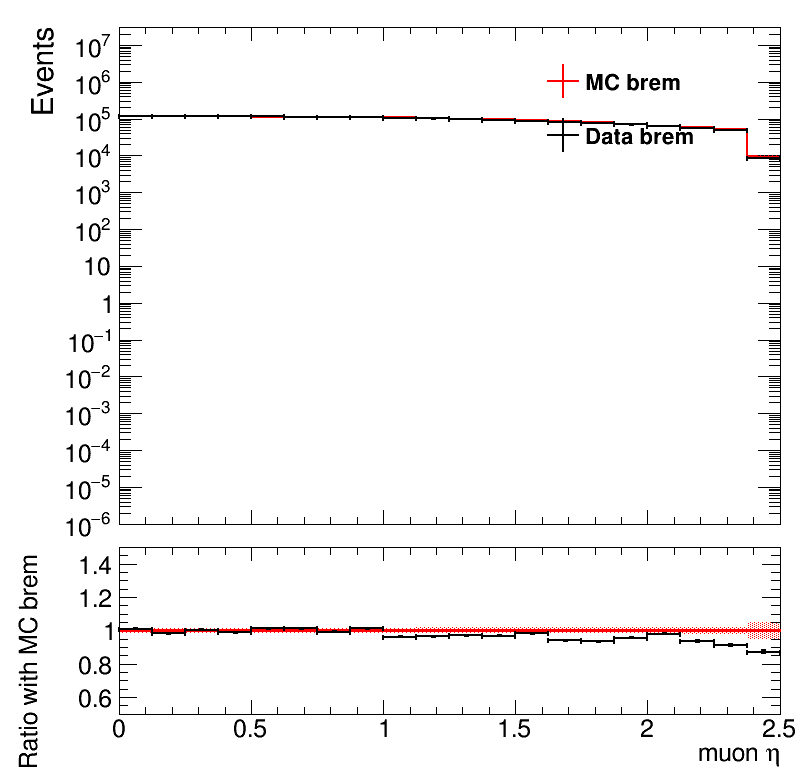

In [89]:
############ PLOTTING #########
import os
h = {}

var = [ZMass, ZMass, ZPt, lepPt, lepE, lepEta]
title = ['Dimuon mass [GeV]','Dimuon mass [GeV]', 'Z p_{T} [GeV]', 'muon pT [GeV]', 'muon E [GeV]', 'muon #eta']

bins = [ [40,int(m1),int(m2)],[25,50,120],  list(np.arange(0,300,25))+[300, 350, 400,500,800], list(np.arange(0,300,25))+[300, 350, 400,500,800], list(np.arange(0,500,50))+[500,575, 650, 725,800,900,1000]+[1200, 1600, 2000], [20,0.0,2.5],]
# bins = [ [40,int(m1),int(m2)],[25,50,120], list(np.arange(0,300,25))+[300, 350, 400,500,800], [50,0,2000], [20,0.0,2.5],]


reweight = False

names = ['ZMass', 'ZMass50_120','ZPt', 'cscRechitCluster2IsoMuonVetoPt', 'cscRechitCluster2IsoMuonVetoE', 'cscRechitCluster2IsoMuonVetoEta']
assert(len(var) == len(title) == len(names) == len(bins) )
dir_name = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_year'+year+\
'_norm'+str(norm)+'_'+ver+sig_ver
print(dir_name)
if tag_probe: dir_name+="_tag_probe"
dir_name += '/'
if not os.path.isdir(dir_name):os.makedirs(dir_name)
keys = ['data', 'dy_'+m1+'_'+m2]
for j, v in enumerate(var):
    if int(m1) >= 120 and j == 1:continue
#     if not j == 4:continue
    for i,k in enumerate(keys):
        total_weight = weight[k]*pileupWeight[k]*mc_corr_weight[k]
        if k[:2] == 'dy': total_weight *= lepOverallSF[k]
        print(len(total_weight), len(var[j][k]))
        if reweight:
            h_reweight = {}
            h_reweight['mc_reweight'] = create_TH1D( np.abs(ZPt[k]), axis_title=['ZPt', 'Events'], name=k, binning=bins[2], weights = total_weight)
            h_reweight['data_reweight'] = create_TH1D( np.abs(ZPt['data']), axis_title=['ZPt', 'Events'], name='data', binning=bins[2], weights = weight['data']*pileupWeight['data']*mc_corr_weight['data'])
            h_reweight['data_reweight'].Divide(h_reweight['mc_reweight'])
            reweight = []
            for m in range(len(ZPt[k])):
                reweight.append(h_reweight['data_reweight'].GetBinContent(h_reweight['data_reweight'].GetXaxis().FindFixBin(np.abs(ZPt[k])[m])))
            total_weight *= reweight
        cond = ZMass[k]>=0
        h[k] = create_TH1D( np.abs(var[j][k][cond].flatten()), axis_title=[title[j], 'Events'], name=k, binning=bins[j], weights = total_weight[cond])

        print(k, h[k].Integral(), np.sum(total_weight))

        h[k].SetLineColor(std_color_list[i])
    print(names[j], h[keys[0]].Integral()*1.0/h[keys[1]].Integral())


    c = make_ratio_plot([h[keys[1]],h[keys[0]]], fit = False, logy=False, in_tags = ["MC brem","Data brem"], ratio_bounds = [0.5,1.5], draw_opt = ['E2','E1']) 
    c.Draw()
    if reweight:
        c.SaveAs(dir_name+names[j]+'_Zmass'+m1+'_'+m2+'_muon'+str(muonPt)+'_norm'+str(norm)+'_ZptReweight.png')
        c.SaveAs(dir_name+names[j]+'_Zmass'+m1+'_'+m2+'_muon'+str(muonPt)+'_norm'+str(norm)+'_ZptReweight.C')
    else:
        c.SaveAs(dir_name+names[j]+'_Zmass'+m1+'_'+m2+'_muon'+str(muonPt)+'_norm'+str(norm)+'.png')
        c.SaveAs(dir_name+names[j]+'_Zmass'+m1+'_'+m2+'_muon'+str(muonPt)+'_norm'+str(norm)+'.C')
    c_log = make_ratio_plot([h[keys[1]],h[keys[0]]], fit = False, logy=True, in_tags = ["MC brem","Data brem"], ratio_bounds = [0.5,1.5], draw_opt = ['E2','E1']) 
    c_log.Draw()
    if reweight:
        c_log.SaveAs(dir_name+names[j]+'_Zmass'+m1+'_'+m2+'_muon'+str(muonPt)+'_norm'+str(norm)+'_ZptReweight_log.png')
        c_log.SaveAs(dir_name+names[j]+'_Zmass'+m1+'_'+m2+'_muon'+str(muonPt)+'_norm'+str(norm)+'_ZptReweight_log.C')
    else:
        c_log.SaveAs(dir_name+names[j]+'_Zmass'+m1+'_'+m2+'_muon'+str(muonPt)+'_norm'+str(norm)+'_log.png')
        c_log.SaveAs(dir_name+names[j]+'_Zmass'+m1+'_'+m2+'_muon'+str(muonPt)+'_norm'+str(norm)+'_log.C')
# for i in range(74):
#     print(i+1, h[keys[0]].GetBinCenter(i+1), h[keys[0]].GetBinContent(i+1)/h[keys[1]].GetBinContent(i+1))


In [5]:
# muon Eta reweight betweeen Data and DY
# use the muon Eta distribution before cluster requirement
h_eta_edges = np.array(list(np.arange(0.8,2.1,0.1)))
h_eta_values = np.array([0.9833463,1.010997,0.9999217,0.9912782,0.9924796,0.9609472,0.9614409,0.9760263,0.9432919,0.9553725,0.9648235,0.9253925])




### Cluster efficiency

In [13]:
%%time

jetPt_cut = 50
tightid = False
pileupWeight = {}
weight = {}
ZPt = {}
ZMass = {}
lepPt = {}
lepEta = {}
lepE = {}
lepE_tag = {}
lepEta_tag = {}
lepPt_tag = {}
mc_corr_weight = {}
rho = {}
npu = {}
npv = {}
tag_index = {}
probe_index = {}
lepOverallSF = {}
sel_lep = {}
sel_ev = {}
lepSF = {}
cond = {}
cscRechitClusterEta = {}
sel_tp = {}
muonPt = 50
norm = 50
cscRechitClusterSize ={}
cscRechitClusterNStation10 ={}
cscRechitClusterAvgStation10 ={}
cut_based = {}
muonEta_weight = {}
tag_probe = True
masses = [('120','800')]
for (m1,m2) in masses:
    keys = ['data', 'dy_'+m1+'_'+m2]
    for k in ['data', 'dy_'+m1+'_'+m2]:
#         if k == 'data':continue
        T = tree_bkg[k]
    ########## select cluster ########
        sel_cluster = np.abs(T.array('cscRechitCluster3Time')) < 12.5
        
        if sig_ver == 'v15':
            sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3Size'))>=40)
        elif sig_ver == 'v18': 
            sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3Size'))>=30)

        else:
            sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3Size'))>=50)
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3TimeSpread'))<20)
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3MaxChamber')) > 12)
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3Eta')) < 2.0)    
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3MuonVetoPt')) > muonPt)
        sel_cluster = np.logical_and(sel_cluster, np.logical_or(T.array('cscRechitCluster3ZLep1') == 1, T.array('cscRechitCluster3ZLep2') == 1))
        print(k,np.count_nonzero(sel_cluster.flatten()))
        if k[:2] == 'dy':sel_cluster = np.logical_and(sel_cluster, T.array('cscRechitCluster3GenMuonVetoPt') > muonPt)
        print(k,np.count_nonzero(sel_cluster.flatten()))
        if tag_probe: 
            sel_cluster1 =np.logical_and(sel_cluster,  T.array('cscRechitCluster3ZLep1') == 1)   #loose lepton
            sel_cluster2 = np.logical_and(sel_cluster,  T.array('cscRechitCluster3ZLep2') == 1)  
        
    # ########### BRANCHES ############
        sel_lep[k] = np.logical_and(T.array('lepPassId')==1, T.array("lepPassTightIso")==1) #tight iso+id lepton
        sel_lep[k] = np.logical_and(sel_lep[k], np.abs(T.array("lepPdgId"))==13) #tight iso+id lepton
        sel_ev[k] = sel_lep[k].sum()>=1
        sel_ev[k] = np.logical_and(sel_ev[k], (T.array('lepPt')>= muonPt).sum()==2)
        if k[:2] == 'dy':sel_ev[k] = np.logical_and(sel_ev[k], T.array('lepFromZ').sum()==2)
        sel_ev[k] = np.logical_and(sel_ev[k], T.array("Flag2_all"))
        sel_ev[k] = np.logical_and(sel_ev[k], T.array('category')==2)
        sel_ev[k] = np.logical_and(sel_ev[k], T['HLTDecision'].array()[:,136])
        if m1 == '50':
            sel_ev[k] = np.logical_and(sel_ev[k], T.array('ZMass')>=int(60))
        else:
            sel_ev[k] = np.logical_and(sel_ev[k], T.array('ZMass')>=int(m1))
        sel_ev[k] = np.logical_and(sel_ev[k], T.array('ZMass')<int(m2))
#         sel_ev[k] = np.logical_and(sel_ev[k], T.array('nCscRechitClusters3')>0)

        probe_index[k] = []
        sel_tp[k] = []
        cond[k] = []
        sel_probecluster = []
        pdgid = T.array("lepPdgId")


        index = 0
        for i, ev in enumerate(sel_ev[k]):
            if ev:
                if sel_lep[k][i][0]:
                    probe_index[k].append([False,True])
                    sel_tp[k].append(index)
                    if pdgid[i][0] == 13:
                        cond[k].append(np.logical_and(sel_cluster2[i].sum()==1, sel_cluster1[i].sum()==0))
                        if cond[k][-1]: sel_probecluster.append(list(sel_cluster2[i]))
                    else:
                        cond[k].append(np.logical_and(sel_cluster1[i].sum()==1, sel_cluster2[i].sum()==0)) 
                        if cond[k][-1]:sel_probecluster.append(list(sel_cluster1[i]))
                if sel_lep[k][i][1]:
                    probe_index[k].append([True, False])
                    sel_tp[k].append(index)
                    if pdgid[i][0] == -13:
                        cond[k].append(np.logical_and(sel_cluster2[i].sum()==1, sel_cluster1[i].sum()==0))
                        if cond[k][-1]:sel_probecluster.append(list(sel_cluster2[i]))
                    else:
                        cond[k].append(np.logical_and(sel_cluster1[i].sum()==1, sel_cluster2[i].sum()==0)) 
                        if cond[k][-1]:sel_probecluster.append(list(sel_cluster1[i]))
                index+=1
        sel_tp[k] = np.array(sel_tp[k])
        probe_index[k] = np.array(probe_index[k])
        cond[k] = np.array(cond[k])
#         sel_probecluster = np.array(sel_probecluster, dtype=bool)
        sel_probecluster = awkward.fromiter(sel_probecluster)



        weight[k] = T.array('weight')[sel_ev[k]][sel_tp[k]]*lumi
        pileupWeight[k] = T.array('pileupWeight')[sel_ev[k]][sel_tp[k]]
        if k[:2] == 'dy': lepOverallSF[k] = T.array('lepOverallSF')[sel_ev[k]][sel_tp[k]]
        ZMass[k]= T.array('ZMass')[sel_ev[k]][sel_tp[k]]
        ZPt[k] = T.array('ZPt')[sel_ev[k]][sel_tp[k]]
        mc_corr_weight[k] =  T.array('ZMass')[sel_ev[k]][sel_tp[k]]
        # with pT > 50
        if norm == 50:
           
            #v14 with lepton SF
#             mc_corr_weight[k][np.logical_and(ZMass[k]>=50,ZMass[k]<120)] = 1.0870881
#             mc_corr_weight[k][np.logical_and(ZMass[k]>=120,ZMass[k]<200)] = 1.1277864
#             mc_corr_weight[k][np.logical_and(ZMass[k]>=200,ZMass[k]<400)] = 1.415694
#             mc_corr_weight[k][np.logical_and(ZMass[k]>=400,ZMass[k]<800)] = 1.4405764
            mc_corr_weight[k][np.logical_and(ZMass[k]>=50,ZMass[k]<120)] = 1.0734578
            mc_corr_weight[k][np.logical_and(ZMass[k]>=120,ZMass[k]<200)] = 1.1120967
            mc_corr_weight[k][np.logical_and(ZMass[k]>=200,ZMass[k]<400)] = 1.393718
            mc_corr_weight[k][np.logical_and(ZMass[k]>=400,ZMass[k]<800)] = 1.4190247
            
        lepE[k] = np.stack(np.array(T.array('lepE')[sel_ev[k]][sel_tp[k]]))[probe_index[k]]
        lepEta[k] = np.stack(np.array(T.array('lepEta')[sel_ev[k]][sel_tp[k]]))[probe_index[k]]
        lepPt[k] = np.stack(np.array(T.array('lepPt')[sel_ev[k]][sel_tp[k]]))[probe_index[k]]
        
        
        muonEta_weight[k] = h_eta_values[np.argmax(h_eta_edges>lepEta[k][:,None],axis=1)-1]


#         cscRechitClusterEta[k] = np.array(T.array('cscRechitCluster3Eta')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster]
        cscRechitClusterEta[k] = T.array('cscRechitCluster3Eta')[sel_ev[k]][sel_tp[k]][cond[k]]
        cscRechitClusterSize[k] = T.array('cscRechitCluster3Size')[sel_ev[k]][sel_tp[k]][cond[k]]
        cscRechitClusterEta[k] = awkward.fromiter(cscRechitClusterEta[k])[sel_probecluster]
        cscRechitClusterSize[k] = awkward.fromiter(cscRechitClusterSize[k])[sel_probecluster]
        cscRechitClusterNStation10[k] = awkward.fromiter(T.array('cscRechitCluster3NStation10')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster]
        cscRechitClusterAvgStation10[k] = awkward.fromiter(T.array('cscRechitCluster3AvgStation10')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster]
        # cut based ID
        cond2 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==2, np.abs(cscRechitClusterEta[k]) < 1.6)
        cond3 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==3, np.abs(cscRechitClusterEta[k]) < 1.6)
        cond4 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==4, np.abs(cscRechitClusterEta[k]) < 1.8)
        cond1 = np.logical_and(cscRechitClusterNStation10[k]==1, np.logical_or(np.logical_or(np.abs(cscRechitClusterAvgStation10[k])==1, cond2), np.logical_or(cond3, cond4)))
        cond2 = np.logical_and(cscRechitClusterNStation10[k] > 1, np.abs(cscRechitClusterEta[k]) < 1.9)
        cut_based[k] = np.logical_or(np.logical_or(cond1, cond2), np.logical_or(cond3, cond4))
        cut_based[k] = cut_based[k][:,0]
        total_weight = pileupWeight[k]*weight[k]*mc_corr_weight[k]*muonEta_weight[k]
        if 'data' == k: total_weight = np.ones(pileupWeight[k].shape)
            
        hm = create_TH1D( np.ones(total_weight[cond[k]].shape)[cut_based[k]], name=k, binning=[1,0,2],weights = total_weight[cond[k]][cut_based[k]] )
        hb = create_TH1D( np.ones(total_weight[cond[k]].shape), name=k, binning=[1,0,2],weights = total_weight[cond[k]])
        eff = rt.TEfficiency(hm,hb)
        print(k,'cut_based efficiency', eff.GetEfficiency(1),eff.GetEfficiencyErrorUp(1),eff.GetEfficiencyErrorLow(1))
    
            
        if k[:2] == 'dy':lepSF[k] = np.stack(np.array(T.array('lepSF')[sel_ev[k]][sel_tp[k]]))[probe_index[k]]

        if k[:4] == 'data':
            pileupWeight[k] = pileupWeight[k] * 0.0 + 1.0
            weight[k] = weight[k] * 0.0 + 1.0
            mc_corr_weight[k] = weight[k] * 0.0 + 1.0
    print(m1,m2, len(weight['data']), np.sum(weight['data']*pileupWeight['data'])/np.sum(lepOverallSF['dy_'+m1+'_'+m2]* weight['dy_'+m1+'_'+m2]*pileupWeight['dy_'+m1+'_'+m2]))



data 4401
data 4401
data cut_based efficiency 0.6504112808460635 0.011758114092229488 0.011939288045714314
dy_120_800 1576
dy_120_800 1575
dy_120_800 cut_based efficiency 0.7163713981607126 0.026716668291779645 0.026716668291779645
120 800 671884 1.1560854
CPU times: user 1min 12s, sys: 1.61 s, total: 1min 14s
Wall time: 1min 24s


Warning in <TROOT::Append>: Replacing existing TH1: data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: dy_120_800 (Potential memory leak).
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Warning in <TEfficiency::GetEfficiencyErrorUp>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorUp>: setting statistic option to kFNormal


Warning in <TROOT::Append>: Replacing existing TH1: hm1 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_out_ratio
Info in <TCanvas::Print>: png file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_year2017_norm50_V1p17v24_tag_probe/cscRechitClusterNStation10shape.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_year2017_norm50_V1p17v24_tag_probe/cscRechitClusterNStation10shape.C has been generated
Warning in <TROOT::Append>: Replacing existing TH1: hm1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hm1 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_out_ratio
Info in <TCanvas::Print>: png file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/p

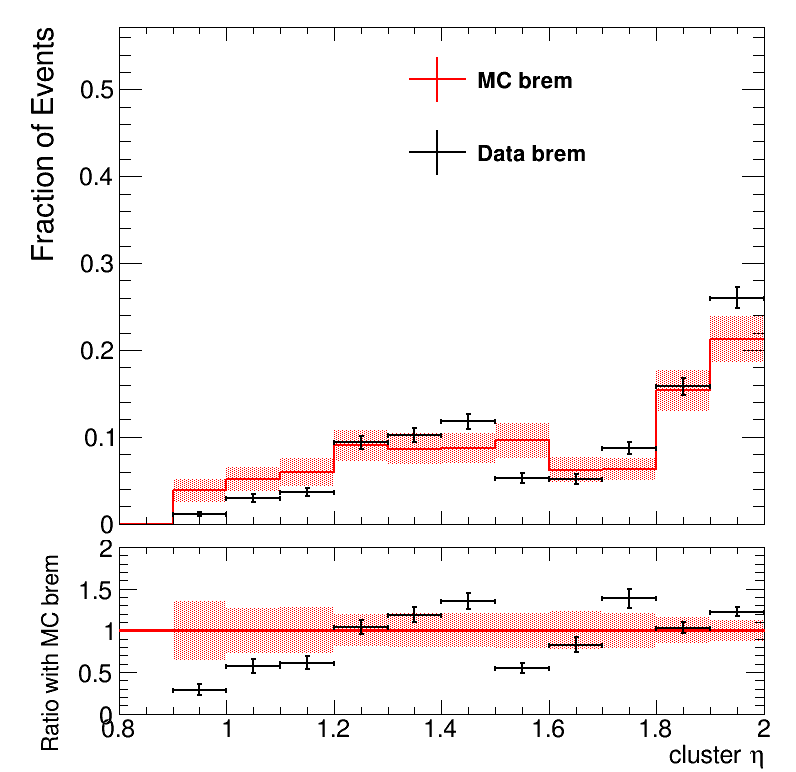

In [14]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot, make_ratio_pEff


c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.2,0.80,0.4,0.90)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)






h= {}

var = [cscRechitClusterNStation10, cscRechitClusterAvgStation10, cscRechitClusterEta ]
title = ['N_{Station}', 'Avg Station', 'cluster #eta']

bins = [[0,1,2,5],[5,0,5], [12, 0.8, 2]]

        
names = ['cscRechitClusterNStation10', 'cscRechitClusterAvgStation10', 'cscRechitClusterEta' ]
assert(len(var) == len(title) == len(names) == len(bins) )

dir_name = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_year'+year+\
'_norm'+str(norm)+'_'+ver+sig_ver
if tag_probe: dir_name+="_tag_probe"
dir_name += '/'
if not os.path.isdir(dir_name):os.makedirs(dir_name)


for j in range(len(bins)):
    if not j == 2:continue
    for i, k in enumerate(cond.keys()):
        total_weight = weight[k]*pileupWeight[k]*mc_corr_weight[k]*muonEta_weight[k]
        if k[:2] == 'dy': total_weight *= lepOverallSF[k]
#         cond_temp = np.logical_and(cond[k], cscRechitClusterSize[k]>=130)
#         rechit_cut = 50
        if j == 0 or j == 2:
            sel = cscRechitClusterNStation10[k]>=0
        else: sel = cscRechitClusterNStation10[k]==1
#         var[j][k][sel]
        var[j][k][sel]
        h[k] = create_TH1D(np.abs(var[j][k][sel.flatten()]), 'hm1', axis_title = [title[j],'Fraction of Events'], binning=bins[j],\
                            weights = total_weight[cond[k]][sel.flatten()])
        

        h[k].SetLineColor(std_color_list[i])
        h[k].SetLineWidth(2)
        h[k].Scale(1./h[k].Integral())
        if k == 'data': leg.AddEntry(h[k], 'Data')
        else: leg.AddEntry(h[k], 'MC')
#         pEff[k].Draw('AP' if i == 0 else 'P same')
    
    c = make_ratio_plot([h[keys[1]],h[keys[0]]], fit = False, logy=False, in_tags = ["MC brem","Data brem"], ratio_bounds = [0.,2], draw_opt = ['E2','E1']) 
    
    rt.gPad.Update()
    c.Draw()
    c.SaveAs(dir_name+names[j]+'shape.png')
    c.SaveAs(dir_name+names[j]+'shape.C')





# length data 350271 8848

In [17]:
total_weight[cond[k]][sel.flatten()]

array([0.9760263, 0.9760263, 0.9253925, ..., 0.9253925, 0.9253925,
       0.9614409])

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot, make_ratio_pEff


c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.2,0.80,0.4,0.90)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)






hm = {}
hb = {}
pEff = {}

var = [ZMass, lepPt, lepE, lepEta]
title = ['Dimuon mass [GeV]', 'muon pT [GeV]', 'muon E [GeV]', 'muon #eta']

bins = [ [20,int(m1),int(m2)],list(np.arange(0,300,25))+[300, 350, 400,500,800], list(np.arange(0,500,50))+[500,575, 650, 725,800,900,1000]+[1200, 2000], [12,0.8,2.0],]

bins = [ [20,int(m1),int(m2)],list(np.arange(0,300,25))+[300, 350, 400,500,800], list(np.arange(0,500,50))+[500,575, 650, 725,800,900,1000]+[1200, 2000], [1,0.8,2.0],]



names = ['ZMass','muonPt', 'muonE', 'muonEta']
assert(len(var) == len(title) == len(names) == len(bins) )
dir_name = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_year'+year+\
'_norm'+str(norm)+'_'+ver+sig_ver
if tag_probe: dir_name+="_tag_probe"
dir_name += '/'
if not os.path.isdir(dir_name):os.makedirs(dir_name)
outputFileName = dir_name +"efficiency_"+'Zmass'+m1+'_'+m2+'_muon'+str(muonPt)+'_norm'+str(norm)+'.root'
print(outputFileName)
# outFile = rt.TFile(outputFileName, 'RECREATE')


for j in range(len(bins)):
    if not j == 3:continue
    for i, k in enumerate(cond.keys()):
        total_weight = weight[k]*pileupWeight[k]*mc_corr_weight[k]
        if k[:2] == 'dy': total_weight *= lepOverallSF[k]
#         cond_temp = np.logical_and(cond[k], cscRechitClusterSize[k]>=130)
        if k == 'data': rechit_cut = 130
        else: rechit_cut = 137
#         rechit_cut = 50
        hm[k] = create_TH1D(np.abs(var[j][k][cond[k]][cscRechitClusterSize[k].flatten()>=rechit_cut]), 'hm1', axis_title = [title[j],'Cluster Efficiency'], binning=bins[j], \
                            weights = total_weight[cond[k]][cscRechitClusterSize[k].flatten()>=rechit_cut])
        hb[k] = create_TH1D(np.abs(var[j][k]), 'hb1', axis_title = [title[j],'Cluster Efficiency'], binning=bins[j],  weights = total_weight)
        print(np.count_nonzero(np.abs(var[j][k][cond[k]])<0.8), len(np.abs(var[j][k][cond[k]])))
        # print(hm.Integral()/hb.Integral(), len(z_denom)/len(llp_z), len(r_denom)/len(llp_r))
#         print(k, hm[k].Integral()/hb[k].Integral()*100)
        
        pEff[k] = rt.TEfficiency(hm[k],hb[k])
        print(k, pEff[k].GetEfficiency(1)*100, pEff[k].GetEfficiencyErrorLow(1)*100)


        pEff[k].SetLineColor(std_color_list[i])
        pEff[k].SetLineWidth(2)
        if k == 'data': leg.AddEntry(pEff[k], 'Data')
        else: leg.AddEntry(pEff[k], 'MC')
#         outFile.WriteTObject(pEff[k], k+'_'+names[j], "WriteDelete");
#         pEff[k].Draw('AP' if i == 0 else 'P same')
    
    c = make_ratio_pEff([pEff[keys[1]],pEff[keys[0]]], fit = False, logy=False, in_tags = ["MC brem","Data brem"], ratio_bounds = [0.,1.5], draw_opt = ['E2','E1']) 
    rt.gPad.Update()
    c.Draw()
#     c.SaveAs(dir_name+"efficiency_"+names[j]+'_Zmass'+m1+'_'+m2+'_muon'+str(muonPt)+'_norm'+str(norm)+'.png')
#     c.SaveAs(dir_name+"efficiency_"+names[j]+'_Zmass'+m1+'_'+m2+'_muon'+str(muonPt)+'_norm'+str(norm)+'.C')

# outFile.Close()




# length data 350271 8848

# calculate inclusive uncertainty on signal

In [67]:
# load signal eta distribution
signal_eta = np.load('/storage/user/christiw/login-1/christiw/LLP/CMSSW_9_4_4/src/llp_analyzer/data/signalEta.npy')


nom = {}
nom_unc = {}
k_target = 'signal'
c = rt.TCanvas('c','c', 800, 600)
h_eta = create_TH1D(np.abs(signal_eta), 'hb1', binning=bins[3])
h_eta.Draw()
# denom_unc = np.sum(weight[k_target]**2)**0.5 #absolute uncertainty of denominator
denom_unc = 0.0
# print("denominator uncertainty:", denom_unc/h_eta.Integral())

for k in pEff.keys():
    nom[k] = 0
    nom_unc[k] = 0
    for i in range(h_eta.GetNbinsX()):
        nom[k] += h_eta.GetBinContent(i+1)*pEff[k].GetEfficiency(i+1)

        if h_eta.GetBinContent(i+1)*pEff[k].GetEfficiency(i+1)>0:            
            nom_unc[k]+=(((h_eta.GetBinError(i+1)/h_eta.GetBinContent(i+1))**2 + (pEff[k].GetEfficiencyErrorLow(i+1)/\
                                                                                  pEff[k].GetEfficiency(i+1))**2)**0.5*h_eta.GetBinContent(i+1)*pEff[k].GetEfficiency(i+1))**2
#             nom_unc[k] += (h_eta.GetBinContent(i+1)*pEff[pEff_key].GetEfficiencyErrorLow(i+1))**2
       

    nom_unc[k] = nom_unc[k]**0.5 ##absolute uncertainty
    print(nom_unc[k]/nom[k])
    eff = nom[k]/h_eta.Integral()
    eff_unc = ((nom_unc[k]/nom[k])**2+(denom_unc/h_eta.Integral())**2)**0.5*eff
    print(k, nom[k]/h_eta.Integral()*100, eff_unc*100)

print(1-nom['data']/nom['dy_120_800'])



0.027169223044387066
data 0.583454452839644 0.015852004165441105
0.06332364619932232
dy_120_800 0.6728374979984211 0.04260652367288926
0.13284492232474632


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: hb1 (Potential memory leak).


[12, 0.8, 2.0]


Warning in <TROOT::Append>: Replacing existing TH1: hb1 (Potential memory leak).


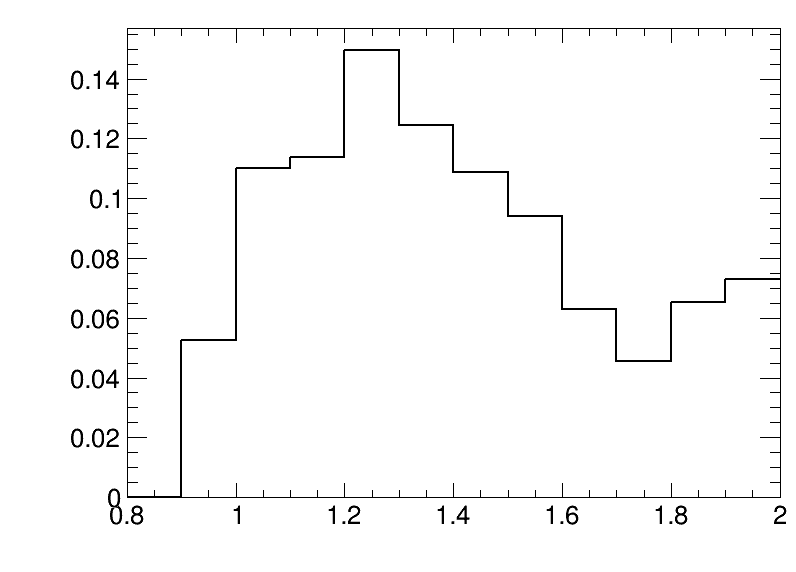

In [70]:
c = rt.TCanvas('c','c', 800, 600)
h_eta = create_TH1D(np.abs(signal_eta), 'hb1', binning=[12,0.8,2])
print(bins[3])
h_eta.DrawNormalized()
c.Draw()

17898 17898
17898
17898 17898 17898
10337 10337
10337
10337 10337 10337


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: hm1 (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_year2017_norm50_V1p17v14_tag_probe/muoneta_vs_clustereta_Zmass120_800_muon50_norm50.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_year2017_norm50_V1p17v14_tag_probe/muoneta_vs_clustereta_Zmass120_800_muon50_norm50.C has been generated


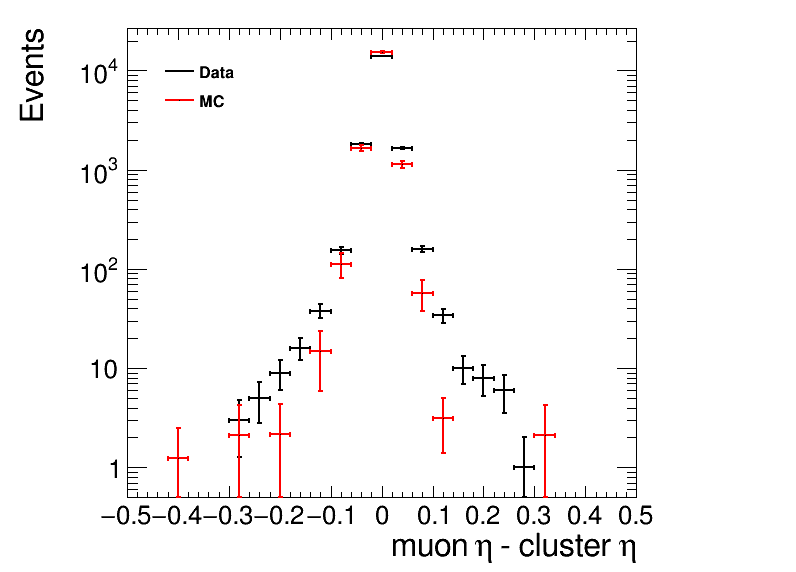

In [188]:
dir_name = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_year'+year+\
'_norm'+str(norm)+'_'+ver+sig_ver
if tag_probe: dir_name+="_tag_probe"
dir_name += '/'
if not os.path.isdir(dir_name):os.makedirs(dir_name)

c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.2,0.80,0.4,0.90)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)

h = {}
for i, k in enumerate(cond.keys()):
    total_weight = weight[k]*pileupWeight[k]*mc_corr_weight[k]
    if k[:2] == 'dy': total_weight *= lepOverallSF[k]
    print(len(lepEta[k][cond[k]].flatten()), len(cscRechitClusterEta[k].flatten()))
#     print(lepEta[k][cond[k]])
#     print(cscRechitClusterEta[k].flatten())
    print(len(np.concatenate(cscRechitClusterEta[k]).ravel()))
#     print((lepEta[k][cond[k]]-cscRechitClusterEta[k]).flatten())
    h[k] = create_TH1D((lepEta[k][cond[k]]-cscRechitClusterEta[k]).flatten(), 'hm1', axis_title = ['muon #eta - cluster #eta','Events'], \
                       binning=[25,-0.5,0.5], weights = total_weight[cond[k]])
    print(len(lepEta[k][cond[k]]), len(cscRechitClusterEta[k]), len(total_weight[cond[k]]))
#     h[k] = create_TH2D(np.column_stack((lepEta[k][cond[k]], cscRechitClusterEta[k])), 'hm1', axis_title = ['lep eta','cluster eta','Events'], \
#                        binning=[25, -5, 5, 25,-5,5], weights = total_weight[cond[k]])
    h[k].SetLineColor(std_color_list[i])
    h[k].SetLineWidth(2)
    if k == 'data': leg.AddEntry(h[k], 'Data')
    else: leg.AddEntry(h[k], 'MC')
    h[k].Draw('same E1')
leg.Draw()
c.SetRightMargin(0.2)
c.SetLogy()

c.Draw()
c.SaveAs(dir_name+'muoneta_vs_clustereta_Zmass'+m1+'_'+m2+'_muon'+str(muonPt)+'_norm'+str(norm)+'.png')
c.SaveAs(dir_name+'muoneta_vs_clustereta_Zmass'+m1+'_'+m2+'_muon'+str(muonPt)+'_norm'+str(norm)+'.C')





# cluster level variables (matched to probe muon, all mass bins)

In [17]:
%%time


import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
import os

jetPt_cut = 50
tightid = False
evtNum  = {}
lumiSec = {}
runNum = {}
sel_tp = {}
pileupWeight = {}
weight = {}
npv = {}
npu = {}
nJets = {}
nJets_50gev = {}
jetPt = {}
jetPhi = {}
jetEta = {}
metPhi = {}
met = {}
jetMet_dPhiMin4 = {}
nJets = {}
jetPhi = {}
jetPt = {}
cscRechitClusterTime = {}
cscRechitClusterJetPhi = {}
cscRechitClusterXSpread = {}
cscRechitClusterYSpread = {}
cscRechitClusterZSpread = {}
cscRechitClusterEtaSpread = {}
cscRechitClusterPhiSpread = {}
cscRechitClusterEtaPhiSpread = {}
dphiMet_cluster = {}
cscRechitClusterX = {}
cscRechitClusterY = {}
cscRechitClusterZ = {}
cscRechitClusterR = {}
cscRechitClusterEta = {}
cscRechitClusterPhi = {}
cscRechitClusterNStation = {}
cscRechitClusterNStation5 = {}
cscRechitClusterNStation10 = {}
cscRechitClusterAvgStation = {}
cscRechitClusterAvgStation5 = {}
cscRechitClusterAvgStation10 = {}
cscRechitClusterMaxStation = {}
cscRechitClusterXYSpread = {}
cscRechitClusterRSpread = {}
cscRechitClusterSize = {}
cscRechitCluster2JetVetoPt = {}
cscRechitCluster2IsoMuonVetoPt = {}
cscRechitCluster2IsoMuonVetoE = {}
cscRechitCluster2IsoMuonVetoEta = {}
cscRechitClusterTimeSpread = {}
cscRechitClusterTimeWireSpread = {}
cscRechitClusterTimeTotalSpread = {}
cscRechitClusterTimeTotalSpreadPruned = {}
muonEta_weight = {}



cscRechitClusterTimeTotal = {}
cscRechitClusterTimeWire = {}
cscRechitClusterTimeWirePruned = {}
jetMet_dPhiMin = {}
bdt_score = {}
ZMass = {}
datasets = {}
sel_lep = {}
sel_ev = {}
cut_based = {}
probe_index = {}
sel_tp = {}
cond = {}
mc_corr_weight = {}
mass_reweight = {}
muonPt = 50
tag_probe = True
norm = False
text = False
scaling = 'norm'
m1, m2 = '120', '800' 
for k in ['data_'+m1+'_'+m2, 'dy_'+m1+'_'+m2]:
    if k[:4] == 'data': T = tree_bkg['data']
    else: T = tree_bkg[k]
    sel_cluster = np.abs(T.array('cscRechitCluster3TimeTotal')) < 125
    if sig_ver == 'v15':
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3Size'))>=40)
    else:
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3Size'))>=50)
#     sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3TimeSpread'))<20)
    sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3MaxChamber')) > 12)
    sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3Eta')) < 2.0)    
    sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3MuonVetoPt')) > muonPt)
    sel_cluster = np.logical_and(sel_cluster, np.logical_or(T.array('cscRechitCluster3ZLep1') == 1, T.array('cscRechitCluster3ZLep2') == 1))
    if k[:2] == 'dy':sel_cluster = np.logical_and(sel_cluster, T.array('cscRechitCluster3GenMuonVetoPt') > muonPt)
    if tag_probe: 
        sel_cluster1 =np.logical_and(sel_cluster,  T.array('cscRechitCluster3ZLep1') == 1)   #loose lepton
        sel_cluster2 = np.logical_and(sel_cluster,  T.array('cscRechitCluster3ZLep2') == 1)  

# ########### BRANCHES ############
    sel_lep[k] = np.logical_and(T.array('lepPassId')==1, T.array("lepPassTightIso")==1) #tight iso+id lepton
    sel_lep[k] = np.logical_and(sel_lep[k], np.abs(T.array("lepPdgId"))==13) #tight iso+id lepton
    sel_ev[k] = sel_lep[k].sum()>=1
    sel_ev[k] = np.logical_and(sel_ev[k], (T.array('lepPt')>= muonPt).sum()==2)
    if k[:2] == 'dy':sel_ev[k] = np.logical_and(sel_ev[k], T.array('lepFromZ').sum()==2)
    sel_ev[k] = np.logical_and(sel_ev[k], T.array("Flag2_all"))
    sel_ev[k] = np.logical_and(sel_ev[k], T.array('category')==2)
    sel_ev[k] = np.logical_and(sel_ev[k], T['HLTDecision'].array()[:,136])
    if m1 == '50':
        sel_ev[k] = np.logical_and(sel_ev[k], T.array('ZMass')>=int(60))
    else:
        sel_ev[k] = np.logical_and(sel_ev[k], T.array('ZMass')>=int(m1))
    sel_ev[k] = np.logical_and(sel_ev[k], T.array('ZMass')<int(m2))
#         sel_ev[k] = np.logical_and(sel_ev[k], T.array('nCscRechitClusters3')>0)

    probe_index[k] = []
    sel_tp[k] = []
    cond[k] = []
    sel_probecluster = []
    pdgid = T.array("lepPdgId")


    index = 0
    for i, ev in enumerate(sel_ev[k]):
        if ev:
            if sel_lep[k][i][0]:
                probe_index[k].append([False,True])
                sel_tp[k].append(index)
                if pdgid[i][0] == 13:
                    cond[k].append(np.logical_and(sel_cluster2[i].sum()==1, sel_cluster1[i].sum()==0))
                    if cond[k][-1]: sel_probecluster.append(sel_cluster2[i])
                else:
                    cond[k].append(np.logical_and(sel_cluster1[i].sum()==1, sel_cluster2[i].sum()==0)) 
                    if cond[k][-1]:sel_probecluster.append(sel_cluster1[i])
            if sel_lep[k][i][1]:
                probe_index[k].append([True, False])
                sel_tp[k].append(index)
                if pdgid[i][0] == -13:
                    cond[k].append(np.logical_and(sel_cluster2[i].sum()==1, sel_cluster1[i].sum()==0))
                    if cond[k][-1]:sel_probecluster.append(sel_cluster2[i])
                else:
                    cond[k].append(np.logical_and(sel_cluster1[i].sum()==1, sel_cluster2[i].sum()==0)) 
                    if cond[k][-1]:sel_probecluster.append(sel_cluster1[i])
            index+=1
    sel_tp[k] = np.array(sel_tp[k])
    probe_index[k] = np.array(probe_index[k])

    cond[k] = np.array(cond[k])
    sel_probecluster = awkward.fromiter(sel_probecluster)

    cscRechitClusterXSpread[k] = awkward.fromiter(T.array('cscRechitCluster3XSpread')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterYSpread[k] = awkward.fromiter(T.array('cscRechitCluster3YSpread')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterZSpread[k] = awkward.fromiter(T.array('cscRechitCluster3ZSpread')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterEtaSpread[k] = awkward.fromiter(T.array('cscRechitCluster3EtaSpread')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterPhiSpread[k] = awkward.fromiter(T.array('cscRechitCluster3PhiSpread')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterXYSpread[k] = awkward.fromiter(T.array('cscRechitCluster3XYSpread')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterRSpread[k] = awkward.fromiter(T.array('cscRechitCluster3RSpread')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterEtaPhiSpread[k] = awkward.fromiter(T.array('cscRechitCluster3EtaPhiSpread')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterX[k] = awkward.fromiter(T.array('cscRechitCluster3X')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterY[k] = awkward.fromiter(T.array('cscRechitCluster3Y')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterR[k] = awkward.fromiter(((T.array('cscRechitCluster3X')**2+T.array('cscRechitCluster3Y')**2)**0.5)[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterZ[k] = awkward.fromiter(T.array('cscRechitCluster3Z')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterEta[k] = awkward.fromiter(T.array('cscRechitCluster3Eta')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterPhi[k] = awkward.fromiter(T.array('cscRechitCluster3Phi')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterSize[k] = awkward.fromiter(T.array('cscRechitCluster3Size')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterTimeSpread[k] = awkward.fromiter(T.array('cscRechitCluster3TimeSpread')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
#     cscRechitClusterTimeWireSpread[k] = awkward.fromiter(T.array('cscRechitCluster3TimeWireSpread')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
#     cscRechitClusterTimeTotalSpread[k] = awkward.fromiter(T.array('cscRechitCluster3TimeTotalSpread')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]

#     cscRechitClusterTimeTotalSpreadPruned[k] = awkward.fromiter(T.array('cscRechitCluster3TimeTotalSpreadPruned')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
#     cscRechitClusterTimeWire[k] = awkward.fromiter(T.array('cscRechitCluster3TimeWire')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
#     cscRechitClusterTimeWirePruned[k] = awkward.fromiter(T.array('cscRechitCluster3TimeWirePruned')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]


    cscRechitClusterTime[k] = awkward.fromiter(T.array('cscRechitCluster3Time')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterTimeTotal[k] = awkward.fromiter(T.array('cscRechitCluster3TimeTotal')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]



    cscRechitCluster2IsoMuonVetoPt[k] = awkward.fromiter(T.array('cscRechitCluster3MuonVetoPt')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitCluster2IsoMuonVetoE[k] = awkward.fromiter(T.array('cscRechitCluster3MuonVetoE')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitCluster2IsoMuonVetoEta[k] = awkward.fromiter(T.array('cscRechitCluster3MuonVetoEta')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    dphiMet_cluster[k] = awkward.fromiter(np.abs(T.array('cscRechitCluster3Met_dPhi'))[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitCluster2JetVetoPt[k] = awkward.fromiter(T.array('cscRechitCluster3JetVetoPt')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterNStation5[k] = awkward.fromiter(T.array('cscRechitCluster3NStation5')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterAvgStation5[k] = awkward.fromiter(T.array('cscRechitCluster3AvgStation5')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterNStation10[k] = awkward.fromiter(T.array('cscRechitCluster3NStation10')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterAvgStation10[k] = awkward.fromiter(T.array('cscRechitCluster3AvgStation10')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterMaxStation[k] = awkward.fromiter(T.array('cscRechitCluster3MaxStation')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]

    ##### bdt variables ####
   
  
    met[k] = T.array('met') [sel_ev[k]][sel_tp[k]][cond[k]]
    weight[k] = T.array('weight')[sel_ev[k]][sel_tp[k]][cond[k]]*lumi/137000.0
    if k[:2] == 'dy': weight[k] *= T.array('lepOverallSF')[sel_ev[k]][sel_tp[k]][cond[k]]
    pileupWeight[k] = T.array('pileupWeight')[sel_ev[k]][sel_tp[k]][cond[k]]
    jetMet_dPhiMin[k] = T.array('jetMet_dPhiMin')[sel_ev[k]][sel_tp[k]][cond[k]]
    
    ZMass[k]= T.array('ZMass')[sel_ev[k]][sel_tp[k]][cond[k]]
    lepEta[k] = np.stack(np.array(T.array('lepEta')[sel_ev[k]][sel_tp[k]]))[cond[k]][probe_index[k]]
    muonEta_weight[k] = h_eta_values[np.argmax(h_eta_edges>lepEta[k][:,None],axis=1)-1]


#    
    
    
    mc_corr_weight[k] =  T.array('ZMass')[sel_ev[k]][sel_tp[k]][cond[k]]
    if k[:2] == 'dy':
        if scaling == 'norm':
            mc_corr_weight[k][np.logical_and(ZMass[k]>50,ZMass[k]<120)] = 1.0464671
            mc_corr_weight[k][np.logical_and(ZMass[k]>120,ZMass[k]<200)] = 1.084997
            mc_corr_weight[k][np.logical_and(ZMass[k]>200,ZMass[k]<400)] = 1.3549542
            mc_corr_weight[k][np.logical_and(ZMass[k]>400,ZMass[k]<800)] = 1.377919
            
            mc_corr_weight[k][np.logical_and(ZMass[k]>=50,ZMass[k]<120)] = 1.0734578
            mc_corr_weight[k][np.logical_and(ZMass[k]>=120,ZMass[k]<200)] = 1.1120967
            mc_corr_weight[k][np.logical_and(ZMass[k]>=200,ZMass[k]<400)] = 1.393718
            mc_corr_weight[k][np.logical_and(ZMass[k]>=400,ZMass[k]<800)] = 1.4190247
        elif scaling == 'norm2':
            mc_corr_weight[k][np.logical_and(ZMass[k]>=50,ZMass[k]<120)] = 0.91870093
            mc_corr_weight[k][np.logical_and(ZMass[k]>=120,ZMass[k]<200)] = 1.1795386
            mc_corr_weight[k][np.logical_and(ZMass[k]>=200,ZMass[k]<400)] = 1.5143042
            mc_corr_weight[k][np.logical_and(ZMass[k]>=400,ZMass[k]<800)] = 1.4587245
        elif scaling == 'norm3':
            mc_corr_weight[k][np.logical_and(ZMass[k]>=50,ZMass[k]<120)] = 0.92965335
            mc_corr_weight[k][np.logical_and(ZMass[k]>=120,ZMass[k]<200)] = 1.1690203
            mc_corr_weight[k][np.logical_and(ZMass[k]>=200,ZMass[k]<400)] = 1.4990053
            mc_corr_weight[k][np.logical_and(ZMass[k]>=400,ZMass[k]<800)] = 1.4548715

            #v14 with lepton sf applied
            mc_corr_weight[k][np.logical_and(ZMass[k]>=50,ZMass[k]<120)] = 0.94598883
            mc_corr_weight[k][np.logical_and(ZMass[k]>=120,ZMass[k]<200)] = 1.1833522
            mc_corr_weight[k][np.logical_and(ZMass[k]>=200,ZMass[k]<400)] = 1.5155867
            mc_corr_weight[k][np.logical_and(ZMass[k]>=400,ZMass[k]<800)] = 1.4747782
        else:
            print("SCALING ERROR")

    print("before weight")


    if k[:4] == 'data':
        pileupWeight[k] = pileupWeight[k] * 0.0 + 1.0
        weight[k] = weight[k] * 0.0 + 1.0
        mc_corr_weight[k] = weight[k] * 0.0 + 1.0
        mass_reweight[k] = weight[k] * 0.0 + 1.0
        muonEta_weight[k] = muonEta_weight[k]*0.0 + 1.0

    cond2 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==2, np.abs(cscRechitClusterEta[k]) < 1.6)
    cond3 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==3, np.abs(cscRechitClusterEta[k]) < 1.6)
    cond4 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==4, np.abs(cscRechitClusterEta[k]) < 1.8)
    cond1 = np.logical_and(cscRechitClusterNStation10[k]==1, np.logical_or(np.logical_or(np.abs(cscRechitClusterAvgStation10[k])==1, cond2), np.logical_or(cond3, cond4)))
    cond2 = np.logical_and(cscRechitClusterNStation10[k] > 1, np.abs(cscRechitClusterEta[k]) < 1.9)
    cut_based[k] = np.logical_or(np.logical_or(cond1, cond2), np.logical_or(cond3, cond4))
    total_weight = pileupWeight[k]*weight[k]*mc_corr_weight[k]*muonEta_weight[k]
    print("cut_based efficiency 10", k, 1.0* np.sum((total_weight)[cut_based[k]])/np.sum(total_weight))
    
    
    time_cond = np.logical_and(cscRechitClusterTimeTotal[k]>-5, cscRechitClusterTimeTotal[k]<12.5)
    hm = create_TH1D( np.ones(cscRechitClusterTimeTotal[k].shape)[time_cond], name=k, binning=[1,0,2],weights = total_weight[time_cond] )
    hb = create_TH1D( np.ones(cscRechitClusterTimeTotal[k].shape), name=k, binning=[1,0,2],weights = total_weight)
    eff = rt.TEfficiency(hm,hb)
    print(k,'time cut efficiency', eff.GetEfficiency(1),eff.GetEfficiencyErrorUp(1),eff.GetEfficiencyErrorLow(1))


    time_cond = cscRechitClusterTimeSpread[k]<20
    hm = create_TH1D( np.ones(cscRechitClusterTimeSpread[k].shape)[time_cond], name=k, binning=[1,0,2],weights = total_weight[time_cond])
    hb = create_TH1D( np.ones(cscRechitClusterTimeSpread[k].shape), name=k, binning=[1,0,2],weights = total_weight)
    eff = rt.TEfficiency(hm,hb)
    print(k,'time spread efficiency', eff.GetEfficiency(1),eff.GetEfficiencyErrorUp(1),eff.GetEfficiencyErrorLow(1))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1703 but corresponding boolean dimension is 671884

In [12]:
# Plotting ncsc
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot, make_ratio_pEff

bdt_name = "cut_based_v4"

rt.gStyle.SetOptFit(1011)
if singleMuon:
    dir_name = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_year'+year+'_'+\
    bdt_name+'_muonShower_'+scaling+'_'+ver+sig_ver
    if tag_probe: dir_name+="_tag_probe"
    dir_name += '/'
else:
    dir_name = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_MET_year'+year+'_XYspread_'+\
    bdt_name+'_muonShower'+ver+sig_ver+'_eta'+str(eta0).replace(".", "p")+'to'+str(round(eta1,1)).replace(".", "p")+'/'

if not os.path.isdir(dir_name):os.makedirs(dir_name)
print(dir_name)


var = [ZMass, ZMass, cscRechitClusterNStation10, cscRechitClusterAvgStation10,cscRechitClusterSize, cscRechitClusterEta, \
    cscRechitClusterTime, cscRechitClusterTimeTotal,cscRechitClusterTimeWire,cscRechitClusterTimeWirePruned,\
       cscRechitClusterTimeSpread, cscRechitClusterTimeWireSpread, cscRechitClusterTimeTotalSpread, cscRechitClusterTimeTotalSpreadPruned,\
       cscRechitClusterXYSpread, cscRechitCluster2IsoMuonVetoPt, cscRechitCluster2IsoMuonVetoE, cscRechitCluster2IsoMuonVetoEta]
title = ['Dimuon mass [GeV]','Dimuon mass [GeV]', 'N_{station}', 'Avg Station','N_{rechits}',  'cluster #eta',
        'cluster strip time [ns]', 'cluster time [ns]','cluster wire time [ns]', 'cluster wire time(pruned) [ns]',\
          'cluster strip time spread [ns]', 'cluster wire time spread [ns]', 'cluster total time spread [ns]', 'cluster total time spread(pruned) [ns]', \
         'cluster XY-spread [cm]', 'matched muon pT [GeV]', 'matched muon E [GeV]', 'matched muon #eta']

bins = [ [25,int(m1),int(m2)],[25,50,120],[5,0,5],[20,1,4], [0, 50, 70, 100, 150, 250, 500], [30,0.8,2.2],\
        [30,-15,15],[30,-15,15],[30,-15,20],[30,-15,20],\
      list(np.arange(0,20,2))+list(np.arange(20,35,5))+[50],list(np.arange(0,20,2))+list(np.arange(20,35,5))+[50],list(np.arange(0,20,2))+list(np.arange(20,35,5))+[50],list(np.arange(0,20,2))+list(np.arange(20,35,5))+[50],\
        [20,0,60], [50,0,800], list(np.arange(0,500,50))+[500,575, 650, 725,800,900,1000]+[1200, 1600, 2000], [10,0.8,2.2],]


names = ['ZMass', 'ZMass50_120','cscRechitClusterNStation10',  'cscRechitClusterAvgStation10',\
        'cscRechitClusterSize', 'cscRechitClusterEta', \
         'cscRechitClusterTime', 'cscRechitClusterTimeTotal', 'cscRechitClusterTimeWire','cscRechitClusterTimeWirePruned',\
               'cscRechitClusterTimeSpread','cscRechitClusterTimeWireSpread','cscRechitClusterTimeTotalSpread','cscRechitClusterTimeTotalSpreadPruned',\
         'cscRechitClusterXYSpread', 'cscRechitCluster2IsoMuonVetoPt', 'cscRechitCluster2IsoMuonVetoE', 'cscRechitCluster2IsoMuonVetoEta']
print(len(var) , len(title) , len(names) , len(bins))
assert(len(var) == len(title) == len(names) == len(bins))
norm = 1
key_plot = ['data_'+m1+'_'+m2, 'dy_'+m1+'_'+m2]
for j,v in enumerate(var):
    if j == 2:continue
#     if not j == 10:continue
    print(names[j])
    h = {}
    h_ks = {}
    maximum = 0
    for i,k in enumerate(key_plot):
        if j >=6 and j<=8:cond = cscRechitClusterTimeSpread[k]<20
        elif j>=10 and j<=13:cond = np.abs(cscRechitClusterTimeTotal[k])<12.5
        else: cond = np.logical_and(np.abs(cscRechitClusterTimeTotal[k])<12.5, cscRechitClusterTimeSpread[k]<20)
        
        total_weight = pileupWeight[k]* weight[k]*mc_corr_weight[k]
        print(k, "total weight", np.sum(total_weight))
        h[k] = create_TH1D( v[k][cond], axis_title=[title[j], 'Events'], name=k, binning=bins[j], weights = total_weight[cond])
        if norm: h[k].Scale(1./h[k].Integral())
        h[k].SetLineColor(std_color_list[i])
#         print(k, np.sum(total_weight[v[k]>=130])/np.sum(total_weight))

        new_cond = np.logical_and(v[k][cond]<12.5, v[k][cond]>-5)
        new_cond = v[k][cond]<20


        hm = create_TH1D( np.ones((np.count_nonzero(new_cond),)), name=k, binning=[1,0,2], weights = total_weight[cond][new_cond])
        hb = create_TH1D( np.ones((len(v[k][cond]),)), name=k, binning=[1,0,2],weights = total_weight[cond])
        eff = rt.TEfficiency(hm,hb)
        print(eff.GetEfficiency(1),eff.GetEfficiencyErrorUp(1),eff.GetEfficiencyErrorLow(1))
        print(k, np.sum(total_weight[cond][new_cond])/np.sum(total_weight[cond]))


        
#         if 'data' in k: 
#             r = h[k].Fit('gaus', 'LRSQ+', '', -5,12) #f(x) = exp(p0+p1*x)
#             print(r)
    
    if j >= 6 or j == 13:c = make_ratio_plot([h[key_plot[1]],h[key_plot[0]]], fit = False, logy=False, in_tags = ["MC brem","Data brem"], ratio_bounds = [0,5], \
                draw_opt = ['E2','E1'])  
    else:c = make_ratio_plot([h[key_plot[1]],h[key_plot[0]]], fit = False, logy=False, in_tags = ["MC brem","Data brem"], ratio_bounds = [0.0,5], \
                draw_opt = ['E2','E1']) 
        
    c.Draw()

    file_name = dir_name+names[j]+"_withRatio_muonPt"+str(muonPt)+"_"+m1+'_'+m2
    if norm: file_name += "_norm"
#     c.SaveAs(file_name+".png")
#     c.SaveAs(file_name+".C")

#     if j >= 18 or j == 26:c_log = make_ratio_plot([h[key_plot[1]],h[key_plot[0]]], fit = False, logy=True, in_tags = ["MC brem","Data brem"], ratio_bounds = [0,5], \
#                 draw_opt = ['E2','E1'])  
#     else:c_log = make_ratio_plot([h[key_plot[1]],h[key_plot[0]]], fit = False, logy=True, in_tags = ["MC brem","Data brem"], ratio_bounds = [0.0,5], \
#                 draw_opt = ['E2','E1']) 

#     c_log.Draw()
#     c_log.SaveAs(file_name+"_log.png")
#     c_log.SaveAs(file_name+"_log.C")
   

NameError: name 'scaling' is not defined

# DY MC by mass bin

In [ ]:
%%time


import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
import os

jetPt_cut = 50
tightid = False
evtNum  = {}
lumiSec = {}
runNum = {}
pileupWeight = {}
weight = {}
npv = {}
npu = {}
nJets = {}
nJets_50gev = {}
jetPt = {}
jetPhi = {}
jetEta = {}
metPhi = {}
met = {}
jetMet_dPhiMin4 = {}
nJets = {}
jetPhi = {}
jetPt = {}
cscRechitClusterJetPhi = {}
cscRechitClusterXSpread = {}
cscRechitClusterYSpread = {}
cscRechitClusterZSpread = {}
cscRechitClusterEtaSpread = {}
cscRechitClusterPhiSpread = {}
cscRechitClusterEtaPhiSpread = {}
dphiMet_cluster = {}
cscRechitClusterX = {}
cscRechitClusterY = {}
cscRechitClusterZ = {}
cscRechitClusterR = {}
cscRechitClusterEta = {}
cscRechitClusterPhi = {}
cscRechitClusterNStation = {}
cscRechitClusterNStation5 = {}
cscRechitClusterNStation10 = {}
cscRechitClusterAvgStation = {}
cscRechitClusterAvgStation5 = {}
cscRechitClusterAvgStation10 = {}
cscRechitClusterMaxStation = {}
cscRechitClusterXYSpread = {}
cscRechitClusterRSpread = {}
cscRechitClusterSize = {}
cscRechitCluster2JetVetoPt = {}
cscRechitCluster2IsoMuonVetoPt = {}
cscRechitCluster2IsoMuonVetoE = {}
cscRechitCluster2IsoMuonVetoEta = {}
cscRechitClusterTimeSpread = {}
jetMet_dPhiMin = {}
bdt_score = {}
ZMass = {}
datasets = {}
cut_based = {}
masses = [('50','120'),('120','200'),('200','400'),('400','800'),('1400','2300'),('2300','3500'),('3500','4500'),('4500','6000'), ('6000','Inf')]
masses = [('50','120'),('120','200'),('200','400'),('400','800')]


muonPt = 40
tag_probe = True
text = False
for (m1, m2) in masses:
    print(m1,m2)
    for k in ['data_'+m1+'_'+m2, 'dy_'+m1+'_'+m2]:
        if k[:4] == 'data': T = tree_bkg['data']
        else: T = tree_bkg[k]
        sel_cluster = np.abs(T.array('cscRechitCluster3Time')) < 12.5
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3Size'))>=50)
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3TimeSpread'))<20)
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3MaxChamber')) > 12)
#         sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2Eta')) >= eta0)
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3Eta')) < 2.0)    
        
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3MuonVetoPt')) > muonPt)
        if not tag_probe: sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3MuonVetoTightIso')) == 1)
        sel_cluster = np.logical_and(sel_cluster, np.logical_or(T.array('cscRechitCluster3ZLep1') == 1, T.array('cscRechitCluster3ZLep2') == 1))
        if k[:2] == 'dy':sel_cluster = np.logical_and(sel_cluster, T.array('cscRechitCluster3GenMuonVetoPt') > muonPt)
        if tag_probe: 
            sel_cluster1 =np.logical_and(sel_cluster,  T.array('cscRechitCluster3ZLep1') == 1)   #loose lepton
            sel_cluster2 = np.logical_and(sel_cluster,  T.array('cscRechitCluster3ZLep2') == 1)  

    # ########### BRANCHES ############
        sel_lep = np.logical_and(T.array('lepPassId')==1, T.array("lepPassTightIso")==1) #tight iso+id lepton
        sel_lep = np.logical_and(sel_lep, T.array('lepPt')> muonPt)
        if k[:2] == 'dy':sel_lep = np.logical_and(sel_lep, T.array('lepFromZ'))
        tag_index1 = T.array('ZleptonIndex1')
        tag_index2 = T.array('ZleptonIndex2')
        cat = T.array('category')==2
        tag1 = []
        tag2 = []
        for ind in range(len(sel_lep)):
            if cat[ind]:
                tag1.append(sel_lep[ind][tag_index1[ind]])
                tag2.append(sel_lep[ind][tag_index2[ind]])
            else:
                tag1.append(False)
                tag2.append(False)
        tag1 = np.array(tag1)
        tag2 = np.array(tag2)
        sel_ev = sel_cluster.sum() ==1 
        if tag_probe: 
            sel_ev = np.logical_or(np.logical_and(tag1, np.logical_and(sel_cluster2.sum()==1, sel_cluster1.sum()==0)), \
                                   np.logical_and(tag2, np.logical_and(sel_cluster1.sum()==1, sel_cluster2.sum()==0)))
        sel_ev = np.logical_and(sel_ev, T.array("Flag2_all"))
        if singleMuon: 
            sel_ev = np.logical_and(sel_ev, T.array('category')==2)
            sel_ev = np.logical_and(sel_ev, T.array('ZMass')>=int(m1))
            if not m2=='Inf': sel_ev = np.logical_and(sel_ev, T.array('ZMass')<int(m2))
        else: sel_ev = np.logical_and(sel_ev, np.abs(T.array('jetMet_dPhiMin'))>2)

        print(k, np.count_nonzero(sel_ev))
        cscRechitClusterXSpread[k] = T.array('cscRechitCluster3XSpread')[sel_cluster][sel_ev][:,0]
        cscRechitClusterYSpread[k] = T.array('cscRechitCluster3YSpread')[sel_cluster][sel_ev][:,0]
        cscRechitClusterZSpread[k] = T.array('cscRechitCluster3ZSpread')[sel_cluster][sel_ev][:,0]
        cscRechitClusterEtaSpread[k] = T.array('cscRechitCluster3EtaSpread')[sel_cluster][sel_ev][:,0]
        cscRechitClusterPhiSpread[k] = T.array('cscRechitCluster3PhiSpread')[sel_cluster][sel_ev][:,0]
        cscRechitClusterXYSpread[k] = T.array('cscRechitCluster3XYSpread')[sel_cluster][sel_ev][:,0]
        cscRechitClusterRSpread[k] = T.array('cscRechitCluster3RSpread')[sel_cluster][sel_ev][:,0]
        cscRechitClusterEtaPhiSpread[k] = T.array('cscRechitCluster3EtaPhiSpread')[sel_cluster][sel_ev][:,0]
        cscRechitClusterX[k] = T.array('cscRechitCluster3X')[sel_cluster][sel_ev][:,0]
        cscRechitClusterY[k] = T.array('cscRechitCluster3Y')[sel_cluster][sel_ev][:,0]
        cscRechitClusterR[k] = ((T.array('cscRechitCluster3X')**2+T.array('cscRechitCluster3Y')**2)**0.5)[sel_cluster][sel_ev][:,0]
        cscRechitClusterZ[k] = T.array('cscRechitCluster3Z')[sel_cluster][sel_ev][:,0]
        cscRechitClusterEta[k] = T.array('cscRechitCluster3Eta')[sel_cluster][sel_ev][:,0]
        cscRechitClusterPhi[k] = T.array('cscRechitCluster3Phi')[sel_cluster][sel_ev][:,0]
        cscRechitClusterSize[k] = T.array('cscRechitCluster3Size')[sel_cluster][sel_ev][:,0]
        cscRechitClusterTimeSpread[k] = T.array('cscRechitCluster3TimeSpread')[sel_cluster][sel_ev][:,0]

        cscRechitCluster2IsoMuonVetoPt[k] = T.array('cscRechitCluster3MuonVetoPt')[sel_cluster][sel_ev][:,0]
        cscRechitCluster2IsoMuonVetoE[k] = T.array('cscRechitCluster3MuonVetoE')[sel_cluster][sel_ev][:,0]
        cscRechitCluster2IsoMuonVetoEta[k] = T.array('cscRechitCluster3MuonVetoEta')[sel_cluster][sel_ev][:,0]
        dphiMet_cluster[k] = np.abs(T.array('cscRechitCluster3Met_dPhi'))[sel_cluster][sel_ev][:,0]
        cscRechitCluster2JetVetoPt[k] = T.array('cscRechitCluster3JetVetoPt')[sel_cluster][sel_ev][:,0]

        cscRechitClusterNStation5[k] = T.array('cscRechitCluster3NStation5')[sel_cluster][sel_ev][:,0]
        cscRechitClusterAvgStation5[k] = T.array('cscRechitCluster3AvgStation5')[sel_cluster][sel_ev][:,0]
        cscRechitClusterNStation10[k] = T.array('cscRechitCluster3NStation10')[sel_cluster][sel_ev][:,0]
        cscRechitClusterAvgStation10[k] = T.array('cscRechitCluster3AvgStation10')[sel_cluster][sel_ev][:,0]
        cscRechitClusterMaxStation[k] = T.array('cscRechitCluster3MaxStation')[sel_cluster][sel_ev][:,0]


        ##### bdt variables ####
        if bdt_name=='bdt_flatten_metfilter_me1112nohits_eta2p1_testsize0p2_abs_XYspread_v11':
            bdt_var = {'cscRechitClusterNStation': cscRechitClusterNStation5[k],
            'cscRechitClusterXSpread': cscRechitClusterXSpread[k],
            'cscRechitClusterYSpread':cscRechitClusterYSpread[k],
            'cscRechitClusterXYSpread':cscRechitClusterXYSpread[k],
            'cscRechitClusterPhi':np.abs(cscRechitClusterPhi[k]),
            'cscRechitClusterEta':np.abs(cscRechitClusterEta[k]),
            'cscRechitClusterZ':np.abs(cscRechitClusterZ[k]),
            }
        elif bdt_name=='bdt_flatten_metfilter_me1112nohits_eta2p1_testsize0p2_abs_XYspread_v12':
            bdt_var = {'cscRechitClusterNStation': cscRechitClusterNStation5[k],
            'cscRechitClusterXSpread': cscRechitClusterXSpread[k],
            'cscRechitClusterYSpread':cscRechitClusterYSpread[k],
            'cscRechitClusterXYSpread':cscRechitClusterXYSpread[k],
            'cscRechitClusterPhi':np.abs(cscRechitClusterPhi[k]),
            'cscRechitClusterEta':np.abs(cscRechitClusterEta[k]),
            'cscRechitClusterAvgStation5':np.abs(cscRechitClusterAvgStation5[k]),
            }
        elif bdt_name =='bdt_flatten_metfilter_me1112nohits_eta2p0_testsize0p2_noSpread_v1':
            bdt_var = {'cscRechitClusterNStation': cscRechitClusterNStation5[k],
            'cscRechitClusterPhi':np.abs(cscRechitClusterPhi[k]),
            'cscRechitClusterEta':np.abs(cscRechitClusterEta[k]),
            'cscRechitClusterAvgStation5':np.abs(cscRechitClusterAvgStation5[k]),
            }
        elif bdt_name =='bdt_flatten_metfilter_me1112nohits_eta2p0_testsize0p2_noSpread_v2':
            bdt_var = {'cscRechitClusterNStation': cscRechitClusterNStation5[k],
            'cscRechitClusterEta':np.abs(cscRechitClusterEta[k]),
            'cscRechitClusterAvgStation5':np.abs(cscRechitClusterAvgStation5[k]),
            }
        elif bdt_name =='bdt_flatten_metfilter_me1112nohits_eta2p0_testsize0p2_noSpread_v3':
            bdt_var = {'cscRechitClusterNStation': cscRechitClusterNStation10[k],
            'cscRechitClusterEta':np.abs(cscRechitClusterEta[k]),
            'cscRechitClusterAvgStation5':np.abs(cscRechitClusterAvgStation10[k]),
            }
        else:
            print('BDT NOT FOUND')
        dataset = pd.DataFrame(bdt_var)
        print("values missing: ", dataset.isnull().values.any())
        datasets[k] = dataset
        bdt_score[k] = model.predict_proba(dataset.values)[:, 1] 
        met[k] = T.array('met') [sel_ev]
        metPhi[k] = T.array('metPhi')[sel_ev]
        npv[k] = T.array('npv')[sel_ev]
        weight[k] = T.array('weight')[sel_ev]*lumi
        pileupWeight[k] = T.array('pileupWeight')[sel_ev]
        jetMet_dPhiMin[k] = T.array('jetMet_dPhiMin')[sel_ev]
        nJets[k] = T.array('nJets')[sel_ev]
        jetPhi[k] = T.array('jetPhi')[sel_ev]
        jetPt[k] = T.array('jetPt')[sel_ev]
        evtNum[k] = T.array('evtNum')[sel_ev]
        lumiSec[k] = T.array('lumiSec')[sel_ev]
        runNum[k] = T.array('runNum')[sel_ev]
        ZMass[k]= T.array('ZMass')[sel_ev]
        if k[:4] == 'data':
            pileupWeight[k] = pileupWeight[k] * 0.0 + 1.0
            weight[k] = weight[k] * 0.0 + 1.0

        #cut based v3
#         cond2 = np.logical_and(np.abs(cscRechitClusterAvgStation5[k])==2, np.abs(cscRechitClusterEta[k]) < 1.6)
#         cond3 = np.logical_and(np.abs(cscRechitClusterAvgStation5[k])==3, np.abs(cscRechitClusterEta[k]) < 1.6)
#         cond4 = np.logical_and(np.abs(cscRechitClusterAvgStation5[k])==4, np.abs(cscRechitClusterEta[k]) < 1.8)
#         cond1 = np.logical_and(cscRechitClusterNStation5[k]==1, np.logical_or(np.logical_or(np.abs(cscRechitClusterAvgStation5[k])==1, cond2), np.logical_or(cond3, cond4)))
#         cond2 = np.logical_and(cscRechitClusterNStation5[k] > 1, np.abs(cscRechitClusterEta[k]) < 1.9)
#         cut_based[k] = np.logical_or(np.logical_or(cond1, cond2), np.logical_or(cond3, cond4))
#         print("cut_based efficiency", k, 1.0* np.sum((pileupWeight[k]*weight[k])[cut_based[k]])/np.sum(pileupWeight[k]*weight[k]))
            
        cond2 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==2, np.abs(cscRechitClusterEta[k]) < 1.6)
        cond3 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==3, np.abs(cscRechitClusterEta[k]) < 1.6)
        cond4 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==4, np.abs(cscRechitClusterEta[k]) < 1.8)
        cond1 = np.logical_and(cscRechitClusterNStation10[k]==1, np.logical_or(np.logical_or(np.abs(cscRechitClusterAvgStation10[k])==1, cond2), np.logical_or(cond3, cond4)))
        cond2 = np.logical_and(cscRechitClusterNStation10[k] > 1, np.abs(cscRechitClusterEta[k]) < 1.9)
        cut_based[k] = np.logical_or(np.logical_or(cond1, cond2), np.logical_or(cond3, cond4))
        print("cut_based efficiency 10", k, 1.0* np.sum((pileupWeight[k]*weight[k])[cut_based[k]])/np.sum(pileupWeight[k]*weight[k]))
        print("BDT efficiency", k, 1.0* np.sum((pileupWeight[k]*weight[k])[bdt_score[k]>bdt_cut])/np.sum(pileupWeight[k]*weight[k]))


    # Plotting ncsc
    ks_prob = []
    ks_prob_str = 'mass_'+m1+'_'+m2
    

    rt.gStyle.SetOptFit(1011)
    if singleMuon:
        dir_name = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_year'+year+'_XYspread_'+\
        bdt_name+'_muonShower'+ver+sig_ver
        if tag_probe: dir_name+="_tag_probe"
        dir_name += '/'
    else:
        dir_name = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_MET_year'+year+'_XYspread_'+\
        bdt_name+'_muonShower'+ver+sig_ver+'_eta'+str(eta0).replace(".", "p")+'to'+str(round(eta1,1)).replace(".", "p")+'/'

    if not os.path.isdir(dir_name):os.makedirs(dir_name)
    var = [ZMass, cscRechitClusterNStation5, cscRechitClusterAvgStation5,cscRechitClusterNStation10, cscRechitClusterAvgStation10,\
    cscRechitClusterMaxStation, dphiMet_cluster, jetMet_dPhiMin, cscRechitClusterSize, bdt_score, cscRechitClusterEta, cscRechitClusterPhi, \
    cscRechitClusterX, cscRechitClusterY, cscRechitClusterZ, cscRechitClusterR, \
       cscRechitClusterEtaSpread, cscRechitClusterPhiSpread, cscRechitClusterEtaPhiSpread, cscRechitClusterRSpread, cscRechitClusterXSpread, cscRechitClusterYSpread, cscRechitClusterZSpread, \
           cscRechitClusterTimeSpread, cscRechitClusterXYSpread, cscRechitCluster2IsoMuonVetoPt, cscRechitCluster2IsoMuonVetoE, cscRechitCluster2IsoMuonVetoEta]
    title = ['Dimuon mass [GeV]', 'N_{station}', 'Avg Station', 'N_{station}', 'Avg Station',\
        'max station', 'dphiMet_cluster', 'jetMet_dPhiMin','N_{rechits}', 'BDT score', 'cluster #eta', 'cluster #phi', \
             'cluster X [cm]','cluster Y [cm]','cluster Z [cm]', 'cluster R [cm]',\
             'cluster #eta spread', 'cluster #phi spread', 'cluster #eta-#phi spread', 'cluster R-spread [cm]', 'cluster X-spread [cm]','cluster Y-spread [cm]','cluster Z-spread [cm]',\
              'cluster time spread [ns]', 'cluster XY-spread [cm]', 'matched muon pT [GeV]', 'matched muon E [GeV]', 'matched muon #eta']

    bins = [ [25,int(m1),int(m2)],[5,0,5],[20,1,4],[5,0,5],[20,1,4], \
            [5,0,5], [10,0,3.2], [10,0,3.2], [0, 50, 70, 100, 150, 250, 500], [10,0,1], [30,0.8,2.2],[25,0,3.2],\
            [15,0,700],[15,0,700], [50,650,1100], [25,200,800],\
            [10,0,0.2], [10,0,0.1],[10,0,0.1], [10,0,100], [20,0,100], [20,0,100], [20,0,100],
           [25,0,50],[20,0,60], [50,0,800], [50,0,2000], [10,0.8,2.2],]

    bins_ks = [ [50,int(m1),int(m2)],[5,0,5],[300,1,4], [5,0,5],[300,1,4], \
               [5,0,5], [1000,0,3.2], [1000,0,3.2], [0, 50, 70, 100, 150, 250, 500], [1000,0,1], [1000,0.8,2.2],[1000,0,3.2],\
               [1000,0,700],[1000,0,700], [1000,600,1100], [500,200,800],\
            [1000,0,0.2], [1000,0,0.1],[1000,0,0.05], [1000,0,150], [1000,0,150], [1000,0,150], [1000,0,200],
           [1000,0,50],[1000,0,60], [1000,0,600], [1000,0,2000], [1000,0.8,2.2],]


    names = ['ZMass', 'cscRechitClusterNStation5',  'cscRechitClusterAvgStation5', 'cscRechitClusterNStation10',  'cscRechitClusterAvgStation10',\
             'cscRechitClusterMaxStation', 'dphiMet_cluster', 'jetMet_dPhiMin', 'cscRechitClusterSize', 'bdt_score', 'cscRechitClusterEta', 'cscRechitClusterPhi', \
             'cscRechitClusterX', 'cscRechitClusterY', 'cscRechitClusterZ', 'cscRechitClusterR',\
       'cscRechitClusterEtaSpread', 'cscRechitClusterPhiSpread', 'cscRechitClusterEtaPhiSpread', 'cscRechitClusterRSpread', 'cscRechitClusterXSpread', 'cscRechitClusterYSpread', 'cscRechitClusterZSpread', \
                   'cscRechitClusterTimeSpread', 'cscRechitClusterXYSpread', 'cscRechitCluster2IsoMuonVetoPt', 'cscRechitCluster2IsoMuonVetoE', 'cscRechitCluster2IsoMuonVetoEta']
    assert(len(var) == len(title) == len(names) == len(bins) == len(bins_ks))

    key_plot = ['data_'+m1+'_'+m2, 'dy_'+m1+'_'+m2]
    for j,v in enumerate(var):
        leg = rt.TLegend(0.55,0.80,0.87,0.90)
        leg.SetTextSize(0.03)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)

        h = {}
        h_ks = {}
        maximum = 0
        for i,k in enumerate(key_plot):
            total_weight = pileupWeight[k]* weight[k]           
            h[k] = create_TH1D( np.abs(v[k]), axis_title=[title[j], 'Events'], name=k, binning=bins[j], weights = total_weight)
            h_ks[k] = create_TH1D( np.abs(v[k]), axis_title=[title[j], 'Events'], name=k, binning=bins_ks[j], weights = total_weight)
            h[k].Scale(1./h[k].Integral())
            h[k].SetLineColor(std_color_list[i])
        texts = 'ks test, p-value: ' + "{:.2E}".format(h_ks['data_'+m1+'_'+m2].KolmogorovTest(h_ks['dy_'+m1+'_'+m2]))
#         c = make_ratio_plot([h[key_plot[1]],h[key_plot[0]], h[key_plot[2]]], fit = False, logy=False, in_tags = ["MC brem","Data brem", "MC signal"], ratio_bounds = [0,3], \
#                     draw_opt = ['E2','E1','hist'], text = texts)       
        if text: c = make_ratio_plot([h[key_plot[1]],h[key_plot[0]]], fit = False, logy=False, in_tags = ["MC brem","Data brem"], ratio_bounds = [0,3], \
                    draw_opt = ['E2','E1'], text = texts)  
        else: c = make_ratio_plot([h[key_plot[1]],h[key_plot[0]]], fit = False, logy=False, in_tags = ["MC brem","Data brem"], ratio_bounds = [0,3], \
                    draw_opt = ['E2','E1'])  
        c.Draw()
        
        if text:       
            c.SaveAs(dir_name+names[j]+"_withRatio_muonPt"+str(muonPt)+"_"+m1+'_'+m2+".png")
            c.SaveAs(dir_name+names[j]+"_withRatio_muonPt"+str(muonPt)+"_"+m1+'_'+m2+".C")
        else:
            c.SaveAs(dir_name+names[j]+"_withRatio_muonPt"+str(muonPt)+"_"+m1+'_'+m2+"_notext.png")
            c.SaveAs(dir_name+names[j]+"_withRatio_muonPt"+str(muonPt)+"_"+m1+'_'+m2+"_notext.C")
        if text: c_log = make_ratio_plot([h[key_plot[1]],h[key_plot[0]]], fit = False, logy=True, in_tags = ["MC brem","Data brem"], ratio_bounds = [0,3], \
                    draw_opt = ['E2','E1'], text = texts)   
        else:c_log = make_ratio_plot([h[key_plot[1]],h[key_plot[0]]], fit = False, logy=True, in_tags = ["MC brem","Data brem"], ratio_bounds = [0,3], \
                    draw_opt = ['E2','E1']) 
        c_log.Draw()
        if text: 
            c_log.SaveAs(dir_name+names[j]+"_withRatio_muonPt"+str(muonPt)+"_"+m1+'_'+m2+"_log.png")
            c_log.SaveAs(dir_name+names[j]+"_withRatio_muonPt"+str(muonPt)+"_"+m1+'_'+m2+"_log.C")
        else:
            c_log.SaveAs(dir_name+names[j]+"_withRatio_muonPt"+str(muonPt)+"_"+m1+'_'+m2+"_notext_log.png")
            c_log.SaveAs(dir_name+names[j]+"_withRatio_muonPt"+str(muonPt)+"_"+m1+'_'+m2+"_notext_log.C")

In [72]:
# efficiency wrt Nstation10

38368 50469
0.76022905
8515 11306
0.7552002


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_year2017_XYspread_bdt_flatten_metfilter_me1112nohits_eta2p0_testsize0p2_noSpread_v3_muonShowerV1p17v9_tag_probe/cut_based_v4_efficiency_NStation10_m50_800.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_year2017_XYspread_bdt_flatten_metfilter_me1112nohits_eta2p0_testsize0p2_noSpread_v3_muonShowerV1p17v9_tag_probe/cut_based_v4_efficiency_NStation10_m50_800.C has been generated
Warning in <TROOT::Append>: Replacing existing TH1: hm1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hb1 (Potential memory leak).
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT

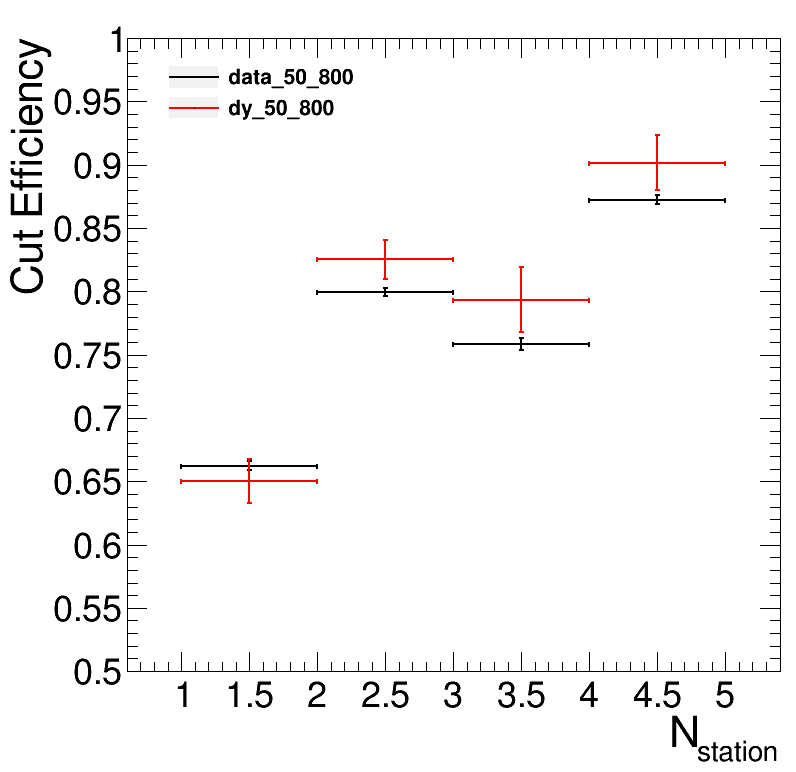

In [74]:

var = cscRechitClusterNStation10
xaxis_title = 'N_{station}'
bins = [5,0,5]
pEff = {}
hm = {}
hb = {}
dir_name = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_year'+year+'_XYspread_'+\
bdt_name+'_muonShower'+ver+sig_ver
if tag_probe: dir_name+="_tag_probe"
dir_name += '/'



masses = [('50','120'),('120','200'),('200','400'),('400','800')]
masses = [('50','800')]
for m1, m2 in masses:
    
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.2,0.84,0.55,0.92)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    for i, k in enumerate(['data_'+m1+'_'+m2,'dy_'+m1+'_'+m2, ]):
        print(np.count_nonzero(cut_based[k]), len(cut_based[k]))
        total_weight = pileupWeight[k]* weight[k] * mc_corr_weight[k]
        print(np.sum(total_weight[cut_based[k]])/np.sum(total_weight))
        hm[k] = create_TH1D( var[k][cut_based[k]], 'hm1', axis_title = [xaxis_title,'Cut Efficiency'], binning=bins, weights = total_weight[cut_based[k]])
        hb[k] = create_TH1D(var[k], 'hb1', axis_title = [xaxis_title,'Cut Efficiency'], binning=bins, weights = total_weight)
        
        pEff[k] = rt.TEfficiency(hm[k],hb[k])
        leg.AddEntry(pEff[k], k)
        pEff[k].SetLineColor(std_color_list[i])
        pEff[k].SetLineWidth(2)
        pEff[k].Draw('' if i == 0 else 'same')
        rt.gPad.Update()
        pEff[k].GetPaintedGraph().SetMaximum(1.0)
        pEff[k].GetPaintedGraph().SetMinimum(0.5)




        leg.Draw()
        c.Draw()
        c.SaveAs(dir_name+"cut_based_v4_efficiency_NStation10_m"+m1+"_"+m2+".png")
        c.SaveAs(dir_name+"cut_based_v4_efficiency_NStation10_m"+m1+"_"+m2+".C")


# pEff[k].GetPaintedGraph().GetHistogram().SetMinimum(0.4)
# pEff[k].GetPaintedGraph().GetHistogram().GetXaxis().SetRangeUser(0,10)
# pEff[k].GetPaintedGraph().GetHistogram().SetMaximum(5.0)
# pEff[k].GetPaintedGraph().GetHistogram().GetYaxis().SetRangeUser(0.0,1.0)



# pEff[k].GetPaintedGraph().GetHistogram().GetXaxis().SetLimit(10)



# rt.gPad.Update()

# efficiency->Draw(); 
# gPad->Update(); 
# auto graph = efficiency->GetPaintedGraph(); 
# graph->SetMInimum(0);
# graph->SetMaximum(1); 
# gPad->Update();

# Correlation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
corr = datasets['mc_signal'].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
f.tight_layout()
plt.show()

In [ ]:
import scipy

leg = rt.TLegend(0.60,0.73,0.85,0.85)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)

c = rt.TCanvas('c','c', 800, 800)
rt.gStyle.SetOptFit(1011)

k = 'data'
h = create_TH2D(np.column_stack((np.abs(cscRechitCluster2IsoMuonVetoE[k]), np.abs(cscRechitClusterEta[k]))),  axis_title=['muon E[GeV]','#eta', 'Events'], \
                binning = [50,0,1100,50,0.8,2])
print(scipy.stats.pearsonr(cscRechitCluster2IsoMuonVetoE[k], cscRechitClusterEta[k]))
h.Draw('colz')
c.SetRightMargin(0.03)
c.SetLogz()

c.Draw()




# check shape for low and high BDT

In [ ]:

k = 'data'
var = [cscRechitClusterNStation, cscRechitClusterNStation5, cscRechitClusterNStation10perc, cscRechitClusterAvgStation, cscRechitClusterAvgStation5, cscRechitClusterAvgStation10perc,\
cscRechitClusterMaxStation, dphiMet_cluster, jetMet_dPhiMin, cscRechitClusterSize, bdt_score, cscRechitClusterEta, cscRechitClusterPhi, \
cscRechitClusterX, cscRechitClusterY, cscRechitClusterZ, cscRechitClusterR, \
   cscRechitClusterEtaSpread, cscRechitClusterPhiSpread, cscRechitClusterEtaPhiSpread, cscRechitClusterRSpread, cscRechitClusterXSpread, cscRechitClusterYSpread, cscRechitClusterZSpread, \
       cscRechitClusterTimeSpread, cscRechitClusterXYSpread, cscRechitCluster2IsoMuonVetoPt, cscRechitCluster2IsoMuonVetoE, cscRechitCluster2IsoMuonVetoEta]
title = ['N_{station}', 'N_{station}', 'N_{station}', 'Avg Station', 'Avg Station', 'Avg Station',\
    'max station', 'dphiMet_cluster', 'jetMet_dPhiMin','N_{rechits}', 'BDT score', 'cluster #eta', 'cluster #phi', \
         'cluster X [cm]','cluster Y [cm]','cluster Z [cm]', 'cluster R [cm]',\
         'cluster #eta spread', 'cluster #phi spread', 'cluster #eta-#phi spread', 'cluster R-spread [cm]', 'cluster X-spread [cm]','cluster Y-spread [cm]','cluster Z-spread [cm]',\
          'cluster time spread [ns]', 'cluster XY-spread [cm]', 'matched muon pT [GeV]', 'matched muon E [GeV]', 'matched muon #eta']

bins = [ [5,0,5], [5,0,5],[5,0,5],[30,1,4], [30,1,4],[30,1,4], \
        [5,0,5], [10,0,3.2], [10,0,3.2], [0, 50, 70, 100, 150, 250, 500], [10,0,1], [30,eta0,eta1+0.05],[25,0,3.2],\
        [15,0,700],[15,0,700], [50,650,1100], [50,200,800],\
        [25,0,0.2], [25,0,0.1],[25,0,0.1], [10,0,100], [20,0,100], [20,0,100], [20,0,100],
       [25,0,50],[20,0,60], [25,0,500], [25,0,500], [10,eta0-0.2,eta1+0.2],]

bins_ks = [ [5,0,5], [5,0,5],[5,0,5],[300,1,4], [300,1,4],[300,1,4], \
           [5,0,5], [1000,0,3.2], [1000,0,3.2], [0, 50, 70, 100, 150, 250, 500], [1000,0,1], [1000,eta0-0.2,eta1+0.2],[1000,0,3.2],\
           [1000,0,700],[1000,0,700], [1000,600,1100], [500,200,800],\
        [1000,0,0.2], [1000,0,0.1],[1000,0,0.05], [1000,0,150], [1000,0,150], [1000,0,150], [1000,0,200],
       [1000,0,50],[1000,0,60], [1000,0,600], [1000,0,600], [1000,eta0-0.3,eta1+0.3],]


names = ['cscRechitClusterNStation', 'cscRechitClusterNStation5', 'cscRechitClusterNStation10perc', 'cscRechitClusterAvgStation', 'cscRechitClusterAvgStation5', 'cscRechitClusterAvgStation10perc',\
         'cscRechitClusterMaxStation', 'dphiMet_cluster', 'jetMet_dPhiMin', 'cscRechitClusterSize', 'bdt_score', 'cscRechitClusterEta', 'cscRechitClusterPhi', \
         'cscRechitClusterX', 'cscRechitClusterY', 'cscRechitClusterZ', 'cscRechitClusterR',\
   'cscRechitClusterEtaSpread', 'cscRechitClusterPhiSpread', 'cscRechitClusterEtaPhiSpread', 'cscRechitClusterRSpread', 'cscRechitClusterXSpread', 'cscRechitClusterYSpread', 'cscRechitClusterZSpread', \
               'cscRechitClusterTimeSpread', 'cscRechitClusterXYSpread', 'cscRechitCluster2IsoMuonVetoPt', 'cscRechitCluster2IsoMuonVetoE', 'cscRechitCluster2IsoMuonVetoEta']
assert(len(var) == len(title) == len(names) == len(bins) == len(bins_ks))

for i in range(len(names)):
    if not i == 20: continue
    cond  = bdt_score[k]<=0.2
    cond = cscRechitCluster2IsoMuonVetoPt[k]<200
    h = {}
    leg = rt.TLegend(0.2,0.73,0.85,0.85)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)

    c = rt.TCanvas('c','c', 800, 800)
    rt.gStyle.SetOptFit(1011)
    # h = create_TH2D(np.column_stack((bdt_score[k][cond], var[i][k][cond])),  axis_title=['bdt score', title[i], 'Events'], binning = [10,0,1]+bins[i])
#     h = create_TH2D(np.column_stack((np.abs(cscRechitClusterEta[k][cond]), np.abs(cscRechitClusterPhi[k][cond]))),  axis_title=['eta', 'phi', 'Events'], binning = [50,0.9,1.2,50,0,3.2])

#     h = create_TH2D(np.column_stack((np.abs(cscRechitClusterXSpread[k][cond]), np.abs(cscRechitClusterYSpread[k][cond]))), \
#                     axis_title=['x spread', 'y spread', 'Events'], binning = [50,0,50,50,0,60])
#     h = create_TH2D(np.column_stack((np.abs(cscRechitClusterRSpread[k][cond]), (cscRechitClusterX[k][cond]**2+cscRechitClusterY[k][cond]**2)**0.5)), \
#                     axis_title=['r spread', 'r', 'Events'], binning = [50,0,100,50,500,700])




    h['low_bdt'] = create_TH1D(var[i][k][cond],  axis_title=[ title[i], 'Events'], binning = bins[i])
    h['high_bdt'] = create_TH1D(var[i][k][np.logical_not(cond)],  axis_title=[ title[i], 'Events'], binning = bins[i])

    h['low_bdt'].SetLineColor(1)
    h['high_bdt'].SetLineColor(2)
    leg.AddEntry(h['low_bdt'],'cscRechitCluster2IsoMuonVetoPt =< 200')
    leg.AddEntry(h['high_bdt'],'cscRechitCluster2IsoMuonVetoPt > 200')

    h['high_bdt'].SetMaximum(h['high_bdt'].Integral())


    h['high_bdt'].DrawNormalized()
    h['low_bdt'].DrawNormalized('same')
#     h.Draw('colz')
    c.SetRightMargin(0.1)
    c.SetLogy()
    leg.Draw()
    c.Draw()
#     c.SaveAs(dir_name+names[i]+"_withRatio_splitBDT_phi"+str(phi_corr).replace(".", "p")+"_r"+str(r_corr).replace(".", "p")+".png")




